<a href="https://colab.research.google.com/github/wpqc21/VulNeuralNetworks/blob/main/Random_Walk_TensorFlow_01_26_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os

import pandas as pd

from PIL import Image

import plotly
import plotly.graph_objects as go

import sys

import glob, re

import cv2

import plotly.express as px

import random

print(tf.__version__)

2.8.0


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

### Necessary Installations:

In [3]:
# https://towardsdatascience.com/tensorflow-gpu-installation-made-easy-use-conda-instead-of-pip-52e5249374bc

In [4]:
# in Ancadonda Prompt:
# conda create --name tf_gpu tensorflow-gpu 
# conda install pillow

In [5]:
# https://github.com/volotat/DiffMorph?msclkid=fd82c265d0f511eca129bc651270dab4

In [6]:
# run from DiffMorph folder

In [7]:
# pip install tensorflow tensorflow-addons opencv-python numpy
# pip install Image
# pip install -- upgrade tensorflow-gpu
# pip install tqdm

In [8]:
# conda install -c conda-forge ffmpeg

#### 05/18/2022

In [9]:
# filename = "foo/bar/baz.txt"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# with open(filename, "w") as f:
#     f.write("FOOBAR")

## Import the Fashion MNIST dataset

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
print("""
      0: Top \n
      1: Trouser \n
      2: Pullover \n
      3: Dress \n
      4: Coat \n
      5: Sandal \n
      6: Shirt \n
      7: Sneaker \n
      8: Bag \n
      9: Ankle boot \n
      """)


      0: Top 

      1: Trouser 

      2: Pullover 

      3: Dress 

      4: Coat 

      5: Sandal 

      6: Shirt 

      7: Sneaker 

      8: Bag 

      9: Ankle boot 

      


## Explore the data

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_images)

10000

## Preprocess the data

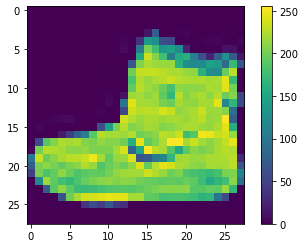

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

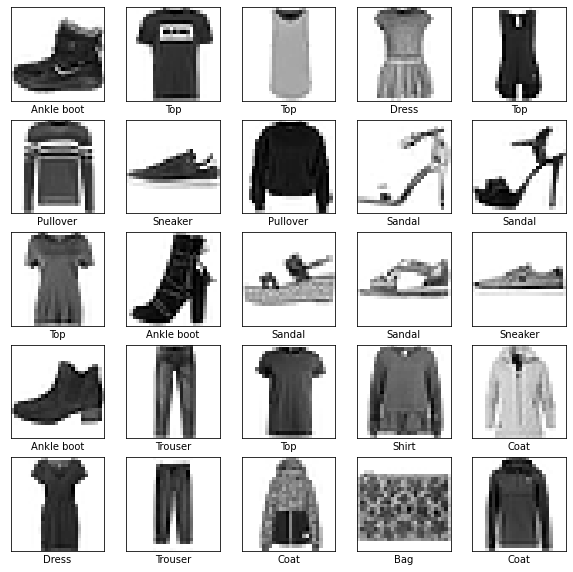

In [19]:
plt.figure(figsize=(10,10), facecolor='white')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

### Set up the layers

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

### Feed the model

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 3ms/step - loss: 0.5017 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3382 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3146 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2960 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.24

In [23]:
model.save('final_model.h5')

### Evaluate accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3605 - accuracy: 0.8719 - 918ms/epoch - 3ms/step

Test accuracy: 0.8719000220298767


In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Make predictions

In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

In [28]:
predictions

array([[2.8981296e-08, 7.7740460e-11, 6.9695172e-10, ..., 2.0428151e-02,
        4.6257838e-09, 9.6995062e-01],
       [2.1951997e-05, 9.7668054e-13, 9.9388158e-01, ..., 7.6950412e-18,
        1.9322579e-13, 1.4055008e-15],
       [2.6831133e-09, 1.0000000e+00, 1.4090647e-11, ..., 2.1422280e-19,
        1.1700185e-13, 7.2952264e-16],
       ...,
       [1.6961490e-05, 3.3302650e-10, 1.8273575e-05, ..., 1.5731239e-10,
        9.9992049e-01, 7.0641248e-15],
       [1.3878203e-08, 9.9999869e-01, 4.0003258e-08, ..., 2.0240747e-12,
        5.9649112e-09, 4.4491633e-12],
       [1.1504324e-04, 1.3238737e-07, 2.0213000e-05, ..., 2.4866026e-02,
        5.8267673e-05, 1.7638027e-05]], dtype=float32)

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

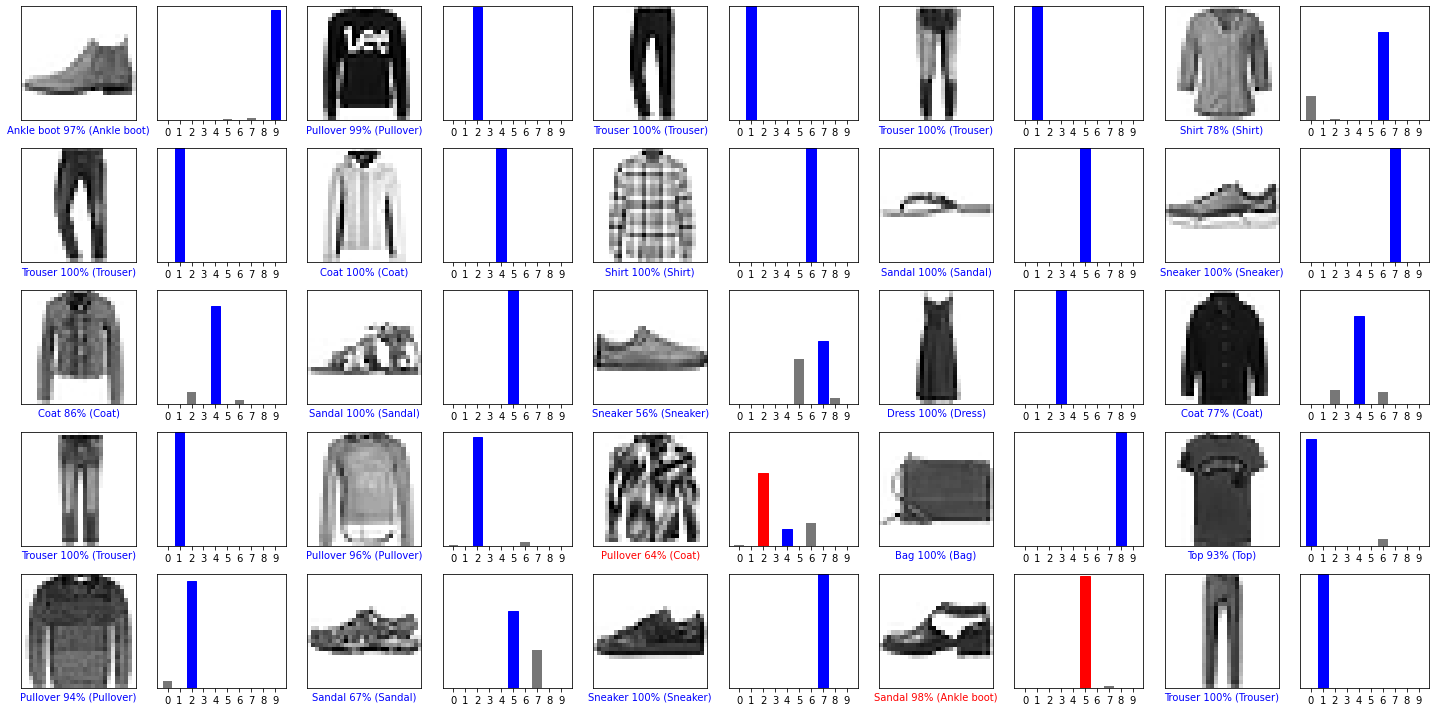

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), facecolor='white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Morphing Data

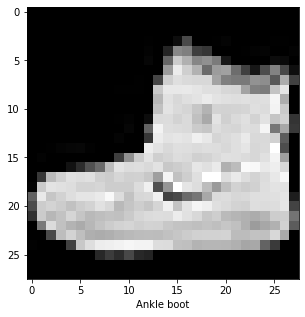

In [31]:
for i in range(1):
    plt.figure(figsize=(5,5), facecolor='white')
#     plt.axis('off')

    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])

#     plt.savefig('t' + str(i) + '.png')
plt.show()

In [32]:
# FIX TO PREDICTION ISSUE: pad_inches = 0, bbox_inches='tight'

os.mkdir('train')
basepath = os.path.abspath('train')

for i in range(100):
    plt.figure(figsize=(10,10))
    plt.axis('off')

    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
    plt.savefig(os.path.join(basepath, 'train_' + str(i) + '_' + class_names[train_labels[i]] + '.png'), pad_inches = 0, 
                 bbox_inches='tight')
plt.show()

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'train'

In [33]:
# https://pythontic.com/image-processing/pillow/blend

In [34]:
# result = np.argmax(model.predict(img_arr[54]), axis=1)

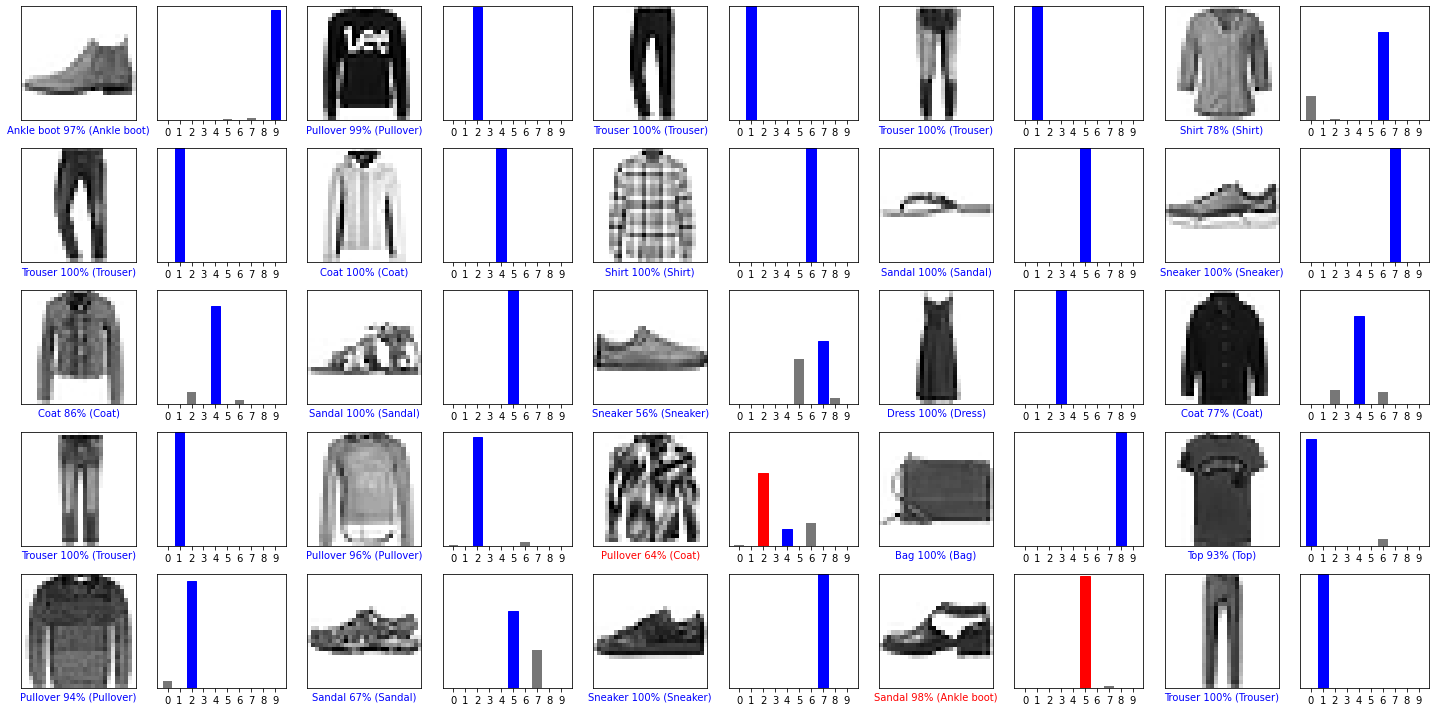

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), facecolor='white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
# %run autoimagemorph.py -inframes "['a0.png','a30.png']" -outprefix a -framerate 30

In [37]:
print('Sample Image: Pullover (2)')
sample_image = Image.open('sample_image.png')
sample_image

Sample Image: Pullover (2)


FileNotFoundError: [Errno 2] No such file or directory: 'sample_image.png'

In [ ]:
os.mkdir('Group_5')
basepath = os.path.abspath('Group_5')

img = cv2.imread(r'train\train_34_Top.png')
filename = 'g5_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 1, Group 5')

img = cv2.imread(r'train\train_32_Shirt.png')
filename = 'g5_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 2, Group 5')

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 3, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_1.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 4, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_2.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 5, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_3.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 6, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_4.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 7, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_5.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 8, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_6.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 9, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_7.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 10, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_8.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 11, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_9.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 12, Group 5')  

img = cv2.imread(r'train\train_47_Dress.png')
filename = 'g5_10_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)
print('Copied image 13, Group 5')   

In [ ]:
# tested:
# GROUP 1:
# r'train\train_5_Pullover.png'
# r'train\train_16_Trouser.png'
# r'train\train_19_Coat.png'

# GROUP 2:
# r'train\train_3_Dress.png'
# r'train\train_8_Sandal.png'
# r'train\train_26_Top.png'

# Group 3:
# r'train\train_6_Sneaker.png'
# r'train\train_11_Ankle boot.png'
# r'train\train_29_Coat.png' 

# Group 4:
# r'train\train_22_Coat.png'
# r'train\train_36_Sandal.png'
# r'train\train_23_Bag.png'

# Group 5:
# r'train\train_34_Top.png'
# r'train\train_32_Shirt.png'
# r'train\train_47_Dress.png'

### NOTE: Staring with bag gives Linear Algebra error code

In [ ]:
group1 = ["Pullover", "Trouser", "Coat"]
group2 = ["Dress", "Sandal", "Top"]
group3 = ["Sneaker", "Ankle boot", "Coat"]
group4 = ["Coat", "Sandal", "Bag"]
group5 = ["Top", "Shirt", "Dress"]

In [ ]:
# test_top = test_top.save('m0.png', subsampling=0, quality=95)
# test_pullover = test_pullover.save('m10.png', subsampling=0, quality=95)
# test_sandal = test_sandal.save('m20.png', subsampling=0, quality=95)

# test_pullover = Image.open('test_pullover.png')
# test_pullover = test_pullover.quantize(16)
# test_pullover = test_pullover.save('test_pullover.png')

In [96]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])
 
# entry point, run the example
run_example()

C:\Users\LIN SHI\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: [Errno 2] No such file or directory: 'sample_image.png'

In [ ]:
def run_example():
    # load the image
    img = load_image(r'train\train_5_Pullover.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result)

run_example()

In [ ]:
def run_example():
    # load the image
    img = load_image(r'train\train_16_Trouser.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])
 
# entry point, run the example
run_example()

In [ ]:
def run_example():
    # load the image
    img = load_image(r'train\train_19_Coat.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])
 
# entry point, run the example
run_example()

In [ ]:
# run in ancadonda command prompt within autoimagemorph directory to create .gif file:
# ffmpeg -framerate 15 -i Group_1\g1_%d.png Group_1\g1.gif
# ffmpeg -framerate 15 -i Group_2\g2_%d.png Group_2\g2.gif
# ffmpeg -framerate 15 -i Group_3\g3_%d.png Group_3\g3.gif
# ffmpeg -framerate 15 -i Group_4\g4_%d.png Group_4\g4.gif
# ffmpeg -framerate 15 -i Group_5\g5_%d.png Group_5\g5.gif

In [ ]:
g1_morph = []
g2_morph = []
g3_morph = []
g4_morph = []
g5_morph = []

In [ ]:
g1_filenames = [img for img in glob.glob('Group_1\g1_*.png')]
g1_filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g1_filenames:
    im=Image.open(filename)
    g1_morph.append(im)

g2_filenames = [img for img in glob.glob('Group_2\g2_*.png')]
g2_filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g2_filenames:
    im=Image.open(filename)
    g2_morph.append(im)

g3_filenames = [img for img in glob.glob('Group_3\g3_*.png')]
g3_filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g3_filenames:
    im=Image.open(filename)
    g3_morph.append(im)

g4_filenames = [img for img in glob.glob('Group_4\g4_*.png')]
g4_filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g4_filenames:
    im=Image.open(filename)
    g4_morph.append(im)

g5_filenames = [img for img in glob.glob('Group_5\g5_*.png')]
g5_filenames.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g5_filenames:
    im=Image.open(filename)
    g5_morph.append(im)

In [ ]:
# for file in g1_filenames:
#     file = os.path.splitext(file)[0]
#     file = file.split('\\')
#     print(file[1])

In [ ]:
len(g1_morph)

In [ ]:
basepath = os.path.abspath('Group_1')

fig = plt.figure(figsize = (10, 10), facecolor='white')

fig.suptitle('Group 1 Image Morph:     \n\n' + group1[0] + '  to  ' + group1[1] + '  to  ' + group1[2])

for x in range(0, 25, 1):
    plt.subplot(5, 5, x + 1), plt.imshow(g1_morph[x*8])
    plt.title('Frame ' + str(x*8))

fig.tight_layout()
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g1.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
basepath = os.path.abspath('Group_2')

fig = plt.figure(figsize = (10, 10), facecolor='white')

fig.suptitle('Group 2 Image Morph:     \n\n' + group2[0] + '  to  ' + group2[1] + '  to  ' + group2[2])

for x in range(0, 25, 1):
    plt.subplot(5, 5, x + 1), plt.imshow(g2_morph[x*8])
    plt.title('Frame ' + str(x*8))

fig.tight_layout()
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g2.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
basepath = os.path.abspath('Group_3')

fig = plt.figure(figsize = (10, 10), facecolor='white')

fig.suptitle('Group 3 Image Morph:     \n\n' + group3[0] + '  to  ' + group3[1] + '  to  ' + group3[2])

for x in range(0, 25, 1):
    plt.subplot(5, 5, x + 1), plt.imshow(g3_morph[x*8])
    plt.title('Frame ' + str(x*8))

fig.tight_layout()
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g3.png'), dpi=300) # To save figure
plt.show() # To show figure

In [38]:
basepath = os.path.abspath('Group_4')

fig = plt.figure(figsize = (10, 10), facecolor='white')

fig.suptitle('Group 4 Image Morph:     \n\n' + group4[0] + '  to  ' + group4[1] + '  to  ' + group4[2])

for x in range(0, 25, 1):
    plt.subplot(5, 5, x + 1), plt.imshow(g4_morph[x*8])
    plt.title('Frame ' + str(x*8))

fig.tight_layout()
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g4.png'), dpi=300) # To save figure
plt.show() # To show figure

NameError: name 'group4' is not defined

<Figure size 720x720 with 0 Axes>

In [39]:
basepath = os.path.abspath('Group_5')

fig = plt.figure(figsize = (10, 10), facecolor='white')

fig.suptitle('Group 5 Image Morph:     \n\n' + group5[0] + '  to  ' + group5[1] + '  to  ' + group5[2])

for x in range(0, 25, 1):
    plt.subplot(5, 5, x + 1), plt.imshow(g5_morph[x*8])
    plt.title('Frame ' + str(x*8))

fig.tight_layout()
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g5.png'), dpi=300) # To save figure
plt.show() # To show figure

NameError: name 'group5' is not defined

<Figure size 720x720 with 0 Axes>

In [40]:
# np.set_printoptions(suppress=True)

In [41]:
# np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [42]:
img = Image.open('Group_1\g1_6.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_1\\g1_6.png'

In [43]:
img = load_image('Group_1\g1_6.png')
img

NameError: name 'load_image' is not defined

In [44]:
predictions_single = probability_model.predict(img)
print(predictions_single)

NameError: name 'img' is not defined

In [45]:
for i in predictions_single:
    for a, b in zip(class_names, i):
        print(a, "    \t", "{:f}".format(b))

NameError: name 'predictions_single' is not defined

In [46]:
plt.figure(facecolor='white')
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

NameError: name 'predictions_single' is not defined

<Figure size 432x288 with 0 Axes>

In [47]:
image1_predictions = []
image2_predictions = []
image3_predictions = []

CRED = '\033[91m'
CWHI = '\033[37m'

for file in g1_filenames:
    def run_example():
        # load the image
        
        print(file, ":")
        img = load_image(file)
        img_r = Image.open(file)
        img_r = img_r.resize((100,100))
        # load model
        model = load_model('final_model.h5')
        # predict the class
        result = np.argmax(model.predict(img), axis=1)
        
        predictions_single = probability_model.predict(img)

        display(img_r , result[0])
        
        plt.figure(facecolor='white')
        
        plot_value_array(1, predictions_single[0], test_labels)
        _ = plt.xticks(range(10), class_names, rotation=45)
        plt.savefig(os.path.splitext(file)[0] + '_pred.png')
        plt.show()
        
        for i in predictions_single:
            for a, b in zip(class_names, i):
                if a in group1:
                    if a in group1[0]:
                        image1_predictions.append(b)
                    elif a in group1[1]:
                        image2_predictions.append(b)
                    elif a in group1[2]:
                        image3_predictions.append(b)
                    print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                else:
                    print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
        print("\n\n")

    # entry point, run the example
    run_example()

NameError: name 'g1_filenames' is not defined

In [48]:
g1_image1_predictions = []
g1_image2_predictions = []
g1_image3_predictions = []

g1_image1_predictions = ["{:f}".format(b) for b in image1_predictions]
g1_image2_predictions = ["{:f}".format(b) for b in image2_predictions]
g1_image3_predictions = ["{:f}".format(b) for b in image3_predictions]

In [49]:
print("Count: \t", group1[0], ":\t", group1[1], ":\t", group1[2],":")
for i, (a, b, c) in enumerate(zip(g1_image1_predictions, g1_image2_predictions, g1_image3_predictions)):
    print(i,"\t", a, "\t", b, "\t", c)

NameError: name 'group1' is not defined

In [50]:
image1_predictions = []
image2_predictions = []
image3_predictions = []

CRED = '\033[91m'
CWHI = '\033[37m'

for file in g2_filenames:
    def run_example():
        # load the image
        
        print(file, ":")
        img = load_image(file)
        img_r = Image.open(file)
        img_r = img_r.resize((100,100))
        # load model
        model = load_model('final_model.h5')
        # predict the class
        result = np.argmax(model.predict(img), axis=1)
        
        predictions_single = probability_model.predict(img)

        display(img_r , result[0])
        
        plt.figure(facecolor='white')
        
        plot_value_array(1, predictions_single[0], test_labels)
        _ = plt.xticks(range(10), class_names, rotation=45)
        plt.savefig(os.path.splitext(file)[0] + '_pred.png')
        plt.show()
        
        for i in predictions_single:
            for a, b in zip(class_names, i):
                if a in group2:
                    if a in group2[0]:
                        image1_predictions.append(b)
                    elif a in group2[1]:
                        image2_predictions.append(b)
                    elif a in group2[2]:
                        image3_predictions.append(b)
                    print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                else:
                    print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
        print("\n\n")

    # entry point, run the example
    run_example()

NameError: name 'g2_filenames' is not defined

In [51]:
g2_image1_predictions = []
g2_image2_predictions = []
g2_image3_predictions = []

g2_image1_predictions = ["{:f}".format(b) for b in image1_predictions]
g2_image2_predictions = ["{:f}".format(b) for b in image2_predictions]
g2_image3_predictions = ["{:f}".format(b) for b in image3_predictions]

In [52]:
print("Count: \t", group2[0], ":\t", group2[1], ":\t", group2[2],":")
for i, (a, b, c) in enumerate(zip(g2_image1_predictions, g2_image2_predictions, g2_image3_predictions)):
    print(i,"\t", a, "\t", b, "\t", c)

NameError: name 'group2' is not defined

In [53]:
image1_predictions = []
image2_predictions = []
image3_predictions = []

CRED = '\033[91m'
CWHI = '\033[37m'

for file in g3_filenames:
    def run_example():
        # load the image
        
        print(file, ":")
        img = load_image(file)
        img_r = Image.open(file)
        img_r = img_r.resize((100,100))
        # load model
        model = load_model('final_model.h5')
        # predict the class
        result = np.argmax(model.predict(img), axis=1)
        
        predictions_single = probability_model.predict(img)

        display(img_r , result[0])
        
        plt.figure(facecolor='white')
        
        plot_value_array(1, predictions_single[0], test_labels)
        _ = plt.xticks(range(10), class_names, rotation=45)
        plt.savefig(os.path.splitext(file)[0] + '_pred.png')
        plt.show()
        
        for i in predictions_single:
            for a, b in zip(class_names, i):
                if a in group3:
                    if a in group3[0]:
                        image1_predictions.append(b)
                    elif a in group3[1]:
                        image2_predictions.append(b)
                    elif a in group3[2]:
                        image3_predictions.append(b)
                    print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                else:
                    print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
        print(CWHI + "\n\n")

    # entry point, run the example
    run_example()

NameError: name 'g3_filenames' is not defined

In [54]:
g3_image1_predictions = []
g3_image2_predictions = []
g3_image3_predictions = []

g3_image1_predictions = ["{:f}".format(b) for b in image1_predictions]
g3_image2_predictions = ["{:f}".format(b) for b in image2_predictions]
g3_image3_predictions = ["{:f}".format(b) for b in image3_predictions]

print("Count: \t", group3[0], ":\t", group3[1], ":\t", group3[2],":")
for i, (a, b, c) in enumerate(zip(g3_image1_predictions, g3_image2_predictions, g3_image3_predictions)):
    print(i,"\t", a, "\t", b, "\t", c)

NameError: name 'group3' is not defined

In [55]:
image1_predictions = []
image2_predictions = []
image3_predictions = []

CRED = '\033[91m'
CWHI = '\033[37m'

for file in g4_filenames:
    def run_example():
        # load the image
        
        print(file, ":")
        img = load_image(file)
        img_r = Image.open(file)
        img_r = img_r.resize((100,100))
        # load model
        model = load_model('final_model.h5')
        # predict the class
        result = np.argmax(model.predict(img), axis=1)
        
        predictions_single = probability_model.predict(img)

        display(img_r , result[0])
        
        plt.figure(facecolor='white')
        
        plot_value_array(1, predictions_single[0], test_labels)
        _ = plt.xticks(range(10), class_names, rotation=45)
        plt.savefig(os.path.splitext(file)[0] + '_pred.png')
        plt.show()
        
        for i in predictions_single:
            for a, b in zip(class_names, i):
                if a in group4:
                    if a in group4[0]:
                        image1_predictions.append(b)
                    elif a in group4[1]:
                        image2_predictions.append(b)
                    elif a in group4[2]:
                        image3_predictions.append(b)
                    print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                else:
                    print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
        print(CWHI + "\n\n")

    # entry point, run the example
    run_example()

NameError: name 'g4_filenames' is not defined

In [56]:
g4_image1_predictions = []
g4_image2_predictions = []
g4_image3_predictions = []

g4_image1_predictions = ["{:f}".format(b) for b in image1_predictions]
g4_image2_predictions = ["{:f}".format(b) for b in image2_predictions]
g4_image3_predictions = ["{:f}".format(b) for b in image3_predictions]

print("Count: \t", group4[0], ":\t\t", group4[1], ":\t", group4[2],":")
for i, (a, b, c) in enumerate(zip(g4_image1_predictions, g4_image2_predictions, g4_image3_predictions)):
    print(i,"\t", a, "\t", b, "\t", c)

NameError: name 'group4' is not defined

In [57]:
image1_predictions = []
image2_predictions = []
image3_predictions = []

CRED = '\033[91m'
CWHI = '\033[37m'

for file in g5_filenames:
    def run_example():
        # load the image
        
        print(file, ":")
        img = load_image(file)
        img_r = Image.open(file)
        img_r = img_r.resize((100,100))
        # load model
        model = load_model('final_model.h5')
        # predict the class
        result = np.argmax(model.predict(img), axis=1)
        
        predictions_single = probability_model.predict(img)

        display(img_r , result[0])
        
        plt.figure(facecolor='white')
        
        plot_value_array(1, predictions_single[0], test_labels)
        _ = plt.xticks(range(10), class_names, rotation=45)
        plt.savefig(os.path.splitext(file)[0] + '_pred.png')
        plt.show()
        
        for i in predictions_single:
            for a, b in zip(class_names, i):
                if a in group5:
                    if a in group5[0]:
                        image1_predictions.append(b)
                    elif a in group5[1]:
                        image2_predictions.append(b)
                    elif a in group5[2]:
                        image3_predictions.append(b)
                    print(CRED + a + "    \t" + "{:f}".format(b) + CRED)
                else:
                    print(CWHI + a + "     \t" + "{:f}".format(b) + CWHI)
        print(CWHI + "\n\n")

    # entry point, run the example
    run_example()

NameError: name 'g5_filenames' is not defined

In [58]:
g5_image1_predictions = []
g5_image2_predictions = []
g5_image3_predictions = []

g5_image1_predictions = ["{:f}".format(b) for b in image1_predictions]
g5_image2_predictions = ["{:f}".format(b) for b in image2_predictions]
g5_image3_predictions = ["{:f}".format(b) for b in image3_predictions]

print("Count: \t", group5[0], ":\t\t", group5[1], ":\t", group5[2],":")
for i, (a, b, c) in enumerate(zip(g5_image1_predictions, g5_image2_predictions, g5_image3_predictions)):
    print(i,"\t", a, "\t", b, "\t", c)

NameError: name 'group5' is not defined

In [59]:
g1_morph_pred = []
g2_morph_pred = []
g3_morph_pred = []
g4_morph_pred = []
g5_morph_pred = []

In [60]:
g1_filenames_pred = [img for img in glob.glob('Group_1\g1*_pred.png')]
g1_filenames_pred.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g1_filenames_pred:
    im=Image.open(filename)
    g1_morph_pred.append(im)

g2_filenames_pred = [img for img in glob.glob('Group_2\g2*_pred.png')]
g2_filenames_pred.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g2_filenames_pred:
    im=Image.open(filename)
    g2_morph_pred.append(im)

g3_filenames_pred = [img for img in glob.glob('Group_3\g3*_pred.png')]
g3_filenames_pred.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g3_filenames_pred:
    im=Image.open(filename)
    g3_morph_pred.append(im)

g4_filenames_pred = [img for img in glob.glob('Group_4\g4*_pred.png')]
g4_filenames_pred.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g4_filenames_pred:
    im=Image.open(filename)
    g4_morph_pred.append(im)

g5_filenames_pred = [img for img in glob.glob('Group_5\g5*_pred.png')]
g5_filenames_pred.sort(key=lambda f: int(re.sub('\D', '', f)))

for filename in g5_filenames_pred:
    im=Image.open(filename)
    g5_morph_pred.append(im)

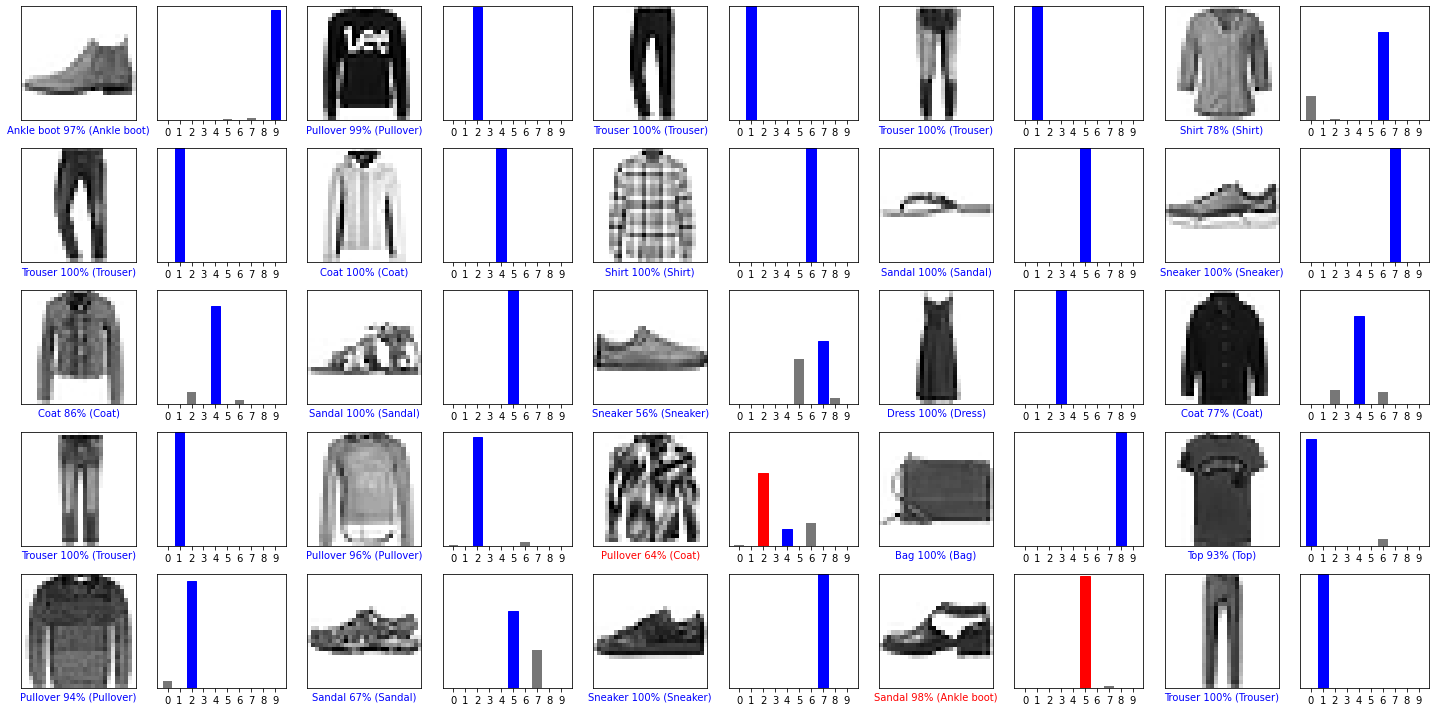

In [61]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), facecolor='white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [62]:
basepath = os.path.abspath('Group_1')

fig = plt.figure(figsize = (20, 20), facecolor='white')

fig.suptitle('Group 1 Image Predictions:     \n\n' + group1[0] + ' to ' + group1[1] + ' to ' + group1[2])


for x in range(0, 25, 1):
    plt.subplot(5, 10, 2*x+1), plt.imshow(g1_morph[x*8])
    plt.axis('off')
    plt.title('Frame '+ str(x*8) + ' Predictions:')
    
    plt.subplot(5, 10, 2*x+2), plt.imshow(g1_morph_pred[x*8])
    plt.axis('off')
#     plt.title('Frame '+ str(x*8) + ' Predictions:')
    
fig.tight_layout()
    
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g1_pred.png'), dpi=300) # To save figure
plt.show() # To show figure

NameError: name 'group1' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
basepath = os.path.abspath('Group_2')

fig = plt.figure(figsize = (20, 20), facecolor='white')

fig.suptitle('Group 2 Image Predictions:     \n\n' + group2[0] + ' to ' + group2[1] + ' to ' + group2[2])


for x in range(0, 25, 1):
    plt.subplot(5, 10, 2*x+1), plt.imshow(g2_morph[x*8])
    plt.axis('off')
    plt.title('Frame '+ str(x*8) + ' Predictions:')
    
    plt.subplot(5, 10, 2*x+2), plt.imshow(g2_morph_pred[x*8])
    plt.axis('off')
#     plt.title('Frame '+ str(x*8) + ' Predictions:')
    
fig.tight_layout()
    
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g2_pred.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
basepath = os.path.abspath('Group_3')

fig = plt.figure(figsize = (20, 20), facecolor='white')

fig.suptitle('Group 3 Image Predictions:     \n\n' + group3[0] + ' to ' + group3[1] + ' to ' + group3[2])


for x in range(0, 25, 1):
    plt.subplot(5, 10, 2*x+1), plt.imshow(g3_morph[x*8])
    plt.axis('off')
    plt.title('Frame '+ str(x*8) + ' Predictions:')
    
    plt.subplot(5, 10, 2*x+2), plt.imshow(g3_morph_pred[x*8])
    plt.axis('off')
#     plt.title('Frame '+ str(x*8) + ' Predictions:')
    
fig.tight_layout()
    
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g3_pred.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
basepath = os.path.abspath('Group_4')

fig = plt.figure(figsize = (20, 20), facecolor='white')

fig.suptitle('Group 4 Image Predictions:     \n\n' + group4[0] + ' to ' + group4[1] + ' to ' + group4[2])


for x in range(0, 25, 1):
    plt.subplot(5, 10, 2*x+1), plt.imshow(g4_morph[x*8])
    plt.axis('off')
    plt.title('Frame '+ str(x*8) + ' Predictions:')
    
    plt.subplot(5, 10, 2*x+2), plt.imshow(g4_morph_pred[x*8])
    plt.axis('off')
#     plt.title('Frame '+ str(x*8) + ' Predictions:')
    
fig.tight_layout()
    
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g4_pred.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
basepath = os.path.abspath('Group_5')

fig = plt.figure(figsize = (20, 20), facecolor='white')

fig.suptitle('Group 5 Image Predictions:     \n\n' + group5[0] + ' to ' + group5[1] + ' to ' + group5[2])


for x in range(0, 25, 1):
    plt.subplot(5, 10, 2*x+1), plt.imshow(g5_morph[x*8])
    plt.axis('off')
    plt.title('Frame '+ str(x*8) + ' Predictions:')
    
    plt.subplot(5, 10, 2*x+2), plt.imshow(g5_morph_pred[x*8])
    plt.axis('off')
#     plt.title('Frame '+ str(x*8) + ' Predictions:')
    
fig.tight_layout()
    
# plt.tight_layout()
plt.savefig(os.path.join(basepath, 'collage_g5_pred.png'), dpi=300) # To save figure
plt.show() # To show figure

In [ ]:
# x = 0
# for i in range(24):
#   colors = ""
#   for j in range(5):
#     code = str(x+j)
#     colors = colors + "\33[" + code + "m\\33[" + code + "m\033[0m "
#   print(colors)
#   x = x + 5

In [ ]:
def run_example():
    # load the image
    img = load_image('Group_1\g1_100.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])
 
# entry point, run the example
run_example()

In [ ]:
def run_example():
    # load the image
    img = load_image('Group_2\g2_100.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])
 
# entry point, run the example
run_example()

# Convert Data to Surface Landscape

In [ ]:
import numpy
import matplotlib

In [ ]:
# Need to remove last 5 elements in order to be perfect square to fit into landscape
print(numpy.sqrt(201))
print(numpy.sqrt(196))

In [ ]:
g1_df = pd.DataFrame({group1[0]: g1_image1_predictions,
                   group1[1] :g1_image2_predictions, 
                   group1[2]: g1_image3_predictions})
g1_df = g1_df.apply(pd.to_numeric)

In [ ]:
g2_df = pd.DataFrame({group2[0]: g2_image1_predictions,
                   group2[1] :g2_image2_predictions, 
                   group2[2]: g2_image3_predictions})
g2_df = g2_df.apply(pd.to_numeric)

In [63]:
g3_df = pd.DataFrame({group3[0]: g3_image1_predictions,
                   group3[1] :g3_image2_predictions, 
                   group3[2]: g3_image3_predictions})
g3_df = g3_df.apply(pd.to_numeric)

NameError: name 'group3' is not defined

In [64]:
g4_df = pd.DataFrame({group4[0]: g4_image1_predictions,
                   group4[1] :g4_image2_predictions, 
                   group4[2]: g4_image3_predictions})
g4_df = g4_df.apply(pd.to_numeric)

NameError: name 'group4' is not defined

In [65]:
g5_df = pd.DataFrame({group5[0]: g5_image1_predictions,
                   group5[1] :g5_image2_predictions, 
                   group5[2]: g5_image3_predictions})
g5_df = g5_df.apply(pd.to_numeric)

NameError: name 'group5' is not defined

In [66]:
g1_image1_landscape = g1_image1_predictions[:-5].copy()
g1_image2_landscape = g1_image2_predictions[:-5].copy()
g1_image3_landscape = g1_image3_predictions[:-5].copy()

g2_image1_landscape = g2_image1_predictions[:-5].copy()
g2_image2_landscape = g2_image2_predictions[:-5].copy()
g2_image3_landscape = g2_image3_predictions[:-5].copy()

g3_image1_landscape = g3_image1_predictions[:-5].copy()
g3_image2_landscape = g3_image2_predictions[:-5].copy()
g3_image3_landscape = g3_image3_predictions[:-5].copy()

g4_image1_landscape = g4_image1_predictions[:-5].copy()
g4_image2_landscape = g4_image2_predictions[:-5].copy()
g4_image3_landscape = g4_image3_predictions[:-5].copy()

g5_image1_landscape = g5_image1_predictions[:-5].copy()
g5_image2_landscape = g5_image2_predictions[:-5].copy()
g5_image3_landscape = g5_image3_predictions[:-5].copy()

shape = (14,14)

g1_image1_world, g1_image2_world, g1_image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)
g2_image1_world, g2_image2_world, g2_image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)
g3_image1_world, g3_image2_world, g3_image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)
g4_image1_world, g4_image2_world, g4_image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)
g5_image1_world, g5_image2_world, g5_image3_world = np.zeros(shape), np.zeros(shape), np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        g1_image1_world[i][j] = g1_image1_landscape[(i*14) + j]
        g1_image2_world[i][j] = g1_image2_landscape[(i*14) + j]
        g1_image3_world[i][j] = g1_image3_landscape[(i*14) + j]
        
        g2_image1_world[i][j] = g2_image1_landscape[(i*14) + j]
        g2_image2_world[i][j] = g2_image2_landscape[(i*14) + j]
        g2_image3_world[i][j] = g2_image3_landscape[(i*14) + j]
        
        g3_image1_world[i][j] = g3_image1_landscape[(i*14) + j]
        g3_image2_world[i][j] = g3_image2_landscape[(i*14) + j]
        g3_image3_world[i][j] = g3_image3_landscape[(i*14) + j]
        
        g4_image1_world[i][j] = g4_image1_landscape[(i*14) + j]
        g4_image2_world[i][j] = g4_image2_landscape[(i*14) + j]
        g4_image3_world[i][j] = g4_image3_landscape[(i*14) + j]
        
        g5_image1_world[i][j] = g5_image1_landscape[(i*14) + j]
        g5_image2_world[i][j] = g5_image2_landscape[(i*14) + j]
        g5_image3_world[i][j] = g5_image3_landscape[(i*14) + j]


IndexError: list index out of range

In [67]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

#Elevation/Height = Z
# Z = world

In [68]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

In [69]:
img = Image.open('Group_1\collage_g1_pred.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_1\\collage_g1_pred.png'

In [70]:
fig = px.line(g1_df, title="Group 1 Image Predictions")
fig.show()

NameError: name 'g1_df' is not defined

In [71]:
fig_g1 = matplotlib.pyplot.figure(figsize=(20,20), facecolor='white')
ax = fig_g1.add_subplot(131, projection="3d",  title='Group 1 Image 1 Predictions Landscape')
ax.plot_surface(x,y,g1_image1_world,cmap='terrain')
ax = fig_g1.add_subplot(132, projection="3d",  title='Group 1 Image 2 Predictions Landscape')
ax.plot_surface(x,y,g1_image2_world,cmap='terrain')
ax = fig_g1.add_subplot(133, projection="3d",  title='Group 1 Image 3 Predictions Landscape')
ax.plot_surface(x,y,g1_image3_world,cmap='terrain')

NameError: name 'matplotlib' is not defined

In [72]:
# # Remove Comment For 3D IMAGE
# fig_g1_i1 = go.Figure(data=[go.Surface(colorscale=terrain,z=g1_image1_world)])
# fig_g1_i2 = go.Figure(data=[go.Surface(colorscale=terrain,z=g1_image2_world)])
# fig_g1_i3 = go.Figure(data=[go.Surface(colorscale=terrain,z=g1_image3_world)])

# fig_g1_i1.update_layout(title='Group 1 Image 1 Predictions Landscape')
# fig_g1_i2.update_layout(title='Group 1 Image 2 Predictions Landscape')
# fig_g1_i3.update_layout(title='Group 1 Image 3 Predictions Landscape')

In [73]:
img = Image.open('Group_2\collage_g2_pred.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_2\\collage_g2_pred.png'

In [74]:
fig = px.line(g2_df, title="Group 2 Image Predictions")
fig.show()

NameError: name 'g2_df' is not defined

In [75]:
fig_g2 = matplotlib.pyplot.figure(figsize=(20,20), facecolor='white')
ax = fig_g2.add_subplot(131, projection="3d",  title='Group 2 Image 1 Predictions Landscape')
ax.plot_surface(x,y,g2_image1_world,cmap='terrain')
ax = fig_g2.add_subplot(132, projection="3d",  title='Group 2 Image 2 Predictions Landscape')
ax.plot_surface(x,y,g2_image2_world,cmap='terrain')
ax = fig_g2.add_subplot(133, projection="3d",  title='Group 2 Image 3 Predictions Landscape')
ax.plot_surface(x,y,g2_image3_world,cmap='terrain')

NameError: name 'matplotlib' is not defined

In [76]:
# # Remove Comment For 3D IMAGE
# fig_g2_i1 = go.Figure(data=[go.Surface(colorscale=terrain,z=g2_image1_world)])
# fig_g2_i2 = go.Figure(data=[go.Surface(colorscale=terrain,z=g2_image2_world)])
# fig_g2_i3 = go.Figure(data=[go.Surface(colorscale=terrain,z=g2_image3_world)])

# fig_g2_i1.update_layout(title='Group 2 Image 1 Predictions Landscape')
# fig_g2_i2.update_layout(title='Group 2 Image 2 Predictions Landscape')
# fig_g2_i3.update_layout(title='Group 2 Image 3 Predictions Landscape')

In [77]:
img = Image.open('Group_3\collage_g3_pred.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_3\\collage_g3_pred.png'

In [78]:
fig = px.line(g3_df, title="Group 3 Image Predictions")
fig.show()

NameError: name 'g3_df' is not defined

In [79]:
fig_g3 = matplotlib.pyplot.figure(figsize=(20,20), facecolor='white')
ax = fig_g3.add_subplot(131, projection="3d",  title='Group 3 Image 1 Predictions Landscape')
ax.plot_surface(x,y,g3_image1_world,cmap='terrain')
ax = fig_g3.add_subplot(132, projection="3d",  title='Group 3 Image 2 Predictions Landscape')
ax.plot_surface(x,y,g3_image2_world,cmap='terrain')
ax = fig_g3.add_subplot(133, projection="3d",  title='Group 3 Image 3 Predictions Landscape')
ax.plot_surface(x,y,g3_image3_world,cmap='terrain')

NameError: name 'matplotlib' is not defined

In [80]:
# # Remove Comment For 3D IMAGE
# fig_g3_i1 = go.Figure(data=[go.Surface(colorscale=terrain,z=g3_image1_world)])
# fig_g3_i2 = go.Figure(data=[go.Surface(colorscale=terrain,z=g3_image2_world)])
# fig_g3_i3 = go.Figure(data=[go.Surface(colorscale=terrain,z=g3_image3_world)])

# fig_g3_i1.update_layout(title='Group 3 Image 1 Predictions Landscape')
# fig_g3_i2.update_layout(title='Group 3 Image 2 Predictions Landscape')
# fig_g3_i3.update_layout(title='Group 3 Image 3 Predictions Landscape')

In [81]:
img = Image.open('Group_4\collage_g4_pred.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_4\\collage_g4_pred.png'

In [82]:
fig = px.line(g4_df, title="Group 4 Image Predictions")
fig.show()

NameError: name 'g4_df' is not defined

In [83]:
fig_g4 = matplotlib.pyplot.figure(figsize=(20,20), facecolor='white')
ax = fig_g4.add_subplot(131, projection="3d",  title='Group 4 Image 1 Predictions Landscape')
ax.plot_surface(x,y,g4_image1_world,cmap='terrain')
ax = fig_g4.add_subplot(132, projection="3d",  title='Group 4 Image 2 Predictions Landscape')
ax.plot_surface(x,y,g4_image2_world,cmap='terrain')
ax = fig_g4.add_subplot(133, projection="3d",  title='Group 4 Image 3 Predictions Landscape')
ax.plot_surface(x,y,g4_image3_world,cmap='terrain')

NameError: name 'matplotlib' is not defined

In [84]:
# # Remove Comment For 3D IMAGE
# fig_g4_i1 = go.Figure(data=[go.Surface(colorscale=terrain,z=g4_image1_world)])
# fig_g4_i2 = go.Figure(data=[go.Surface(colorscale=terrain,z=g4_image2_world)])
# fig_g4_i3 = go.Figure(data=[go.Surface(colorscale=terrain,z=g4_image3_world)])

# fig_g4_i1.update_layout(title='Group 4 Image 1 Predictions Landscape')
# fig_g4_i2.update_layout(title='Group 4 Image 2 Predictions Landscape')
# fig_g4_i3.update_layout(title='Group 4 Image 3 Predictions Landscape')

In [85]:
img = Image.open('Group_5\collage_g5_pred.png')
img

FileNotFoundError: [Errno 2] No such file or directory: 'Group_5\\collage_g5_pred.png'

In [86]:
fig = px.line(g5_df, title="Group 5 Image Predictions")
fig.show()

NameError: name 'g5_df' is not defined

In [87]:
fig_g5 = matplotlib.pyplot.figure(figsize=(20,20), facecolor='white')
ax = fig_g5.add_subplot(131, projection="3d",  title='Group 5 Image 1 Predictions Landscape')
ax.plot_surface(x,y,g5_image1_world,cmap='terrain')
ax = fig_g5.add_subplot(132, projection="3d",  title='Group 5 Image 2 Predictions Landscape')
ax.plot_surface(x,y,g5_image2_world,cmap='terrain')
ax = fig_g5.add_subplot(133, projection="3d",  title='Group 5 Image 3 Predictions Landscape')
ax.plot_surface(x,y,g5_image3_world,cmap='terrain')

NameError: name 'matplotlib' is not defined

In [88]:
# # Remove Comment For 3D IMAGE
# fig_g5_i1 = go.Figure(data=[go.Surface(colorscale=terrain,z=g5_image1_world)])
# fig_g5_i2 = go.Figure(data=[go.Surface(colorscale=terrain,z=g5_image2_world)])
# fig_g5_i3 = go.Figure(data=[go.Surface(colorscale=terrain,z=g5_image3_world)])

# fig_g5_i1.update_layout(title='Group 5 Image 1 Predictions Landscape')
# fig_g5_i2.update_layout(title='Group 5 Image 2 Predictions Landscape')
# fig_g5_i3.update_layout(title='Group 5 Image 3 Predictions Landscape')

In [89]:
# Frame 20, Frame 40, Frame 60, Frame 80, Frame 100 between graph 1 & 2
# Frame 120, Frame 140, Frame 160, Frame 180, Frame 200 between graph 2 & 3

In [90]:
print(os.getcwd())

C:\Users\LIN SHI\Desktop\random will


In [91]:
def G1G2_To_G2G3(x, y):
    new_folder = f'{x}G1G2_To_{y}G2G3'
    os.mkdir(new_folder)
    basepath = os.path.abspath(new_folder)

    order = x
    img = cv2.imread(f'Group_1\g1_{order}.png')
    filename = 'g0.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

    order = y+100
    img = cv2.imread(f'Group_1\g1_{order}.png')
    filename = 'g10.png'
    cv2.imwrite(os.path.join(basepath, filename), img)  
    return new_folder

### 06/17/22

### Group 1 123

In [ ]:
os.mkdir('Group_1_123')
basepath = os.path.abspath('Group_1_123')

img = cv2.imread(r'train\train_5_Pullover.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_16_Trouser.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_19_Coat.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_0.png','Group_1_123\g1_0_10.png']" -outprefix Group_1_123\g1_0_ -framerate 10

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_0.png', 'Group_1_123\g1_10_0.png']" -outprefix Group_1_123\g1_ -framerate 10
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_1.png', 'Group_1_123\g1_10_1.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_2.png', 'Group_1_123\g1_10_2.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_123\g1_0_3.png', 'Group_1_123\g1_10_3.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_4.png', 'Group_1_123\g1_10_4.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_5.png', 'Group_1_123\g1_10_5.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_6.png', 'Group_1_123\g1_10_6.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_7.png', 'Group_1_123\g1_10_7.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_8.png', 'Group_1_123\g1_10_8.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_9.png', 'Group_1_123\g1_10_9.png']" -outprefix Group_1_123\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_123\g1_0_10.png', 'Group_1_123\g1_10_10.png']" -outprefix Group_1_123\g1_ -framerate 10
for i in range(1,10):
    os.rename('./Group_1_123/g1_'+str(i)+'.png', './Group_1_123/g1_'+str(i)+'_10.png')

### Group 1 132

In [ ]:
os.mkdir('Group_1_132')
basepath = os.path.abspath('Group_1_132')

img = cv2.imread(r'train\train_5_Pullover.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_19_Coat.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_16_Trouser.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_0.png','Group_1_132\g1_0_10.png']" -outprefix Group_1_132\g1_0_ -framerate 10

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_0.png', 'Group_1_132\g1_10_0.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_1.png', 'Group_1_132\g1_10_1.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_2.png', 'Group_1_132\g1_10_2.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_132\g1_0_3.png', 'Group_1_132\g1_10_3.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_4.png', 'Group_1_132\g1_10_4.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_5.png', 'Group_1_132\g1_10_5.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_6.png', 'Group_1_132\g1_10_6.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_7.png', 'Group_1_132\g1_10_7.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_8.png', 'Group_1_132\g1_10_8.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_9.png', 'Group_1_132\g1_10_9.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_132\g1_0_10.png', 'Group_1_132\g1_10_10.png']" -outprefix Group_1_132\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_132/g1_'+str(i)+'.png', './Group_1_132/g1_'+str(i)+'_10.png')

### Group 1 213

In [ ]:
os.mkdir('Group_1_213')
basepath = os.path.abspath('Group_1_213')

img = cv2.imread(r'train\train_16_Trouser.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_5_Pullover.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_19_Coat.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_0.png','Group_1_213\g1_0_10.png']" -outprefix Group_1_213\g1_0_ -framerate 10

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_0.png', 'Group_1_213\g1_10_0.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_1.png', 'Group_1_213\g1_10_1.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_2.png', 'Group_1_213\g1_10_2.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_213\g1_0_3.png', 'Group_1_213\g1_10_3.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_4.png', 'Group_1_213\g1_10_4.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_5.png', 'Group_1_213\g1_10_5.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_6.png', 'Group_1_213\g1_10_6.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_7.png', 'Group_1_213\g1_10_7.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_8.png', 'Group_1_213\g1_10_8.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_9.png', 'Group_1_213\g1_10_9.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_213\g1_0_10.png', 'Group_1_213\g1_10_10.png']" -outprefix Group_1_213\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_213/g1_'+str(i)+'.png', './Group_1_213/g1_'+str(i)+'_10.png')

### Group 1 231

In [ ]:
os.mkdir('Group_1_231')
basepath = os.path.abspath('Group_1_231')

img = cv2.imread(r'train\train_16_Trouser.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_19_Coat.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_5_Pullover.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_0.png','Group_1_231\g1_0_10.png']" -outprefix Group_1_231\g1_0_ -framerate 10

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_0.png', 'Group_1_231\g1_10_0.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_1.png', 'Group_1_231\g1_10_1.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_2.png', 'Group_1_231\g1_10_2.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_231\g1_0_3.png', 'Group_1_231\g1_10_3.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_4.png', 'Group_1_231\g1_10_4.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_5.png', 'Group_1_231\g1_10_5.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_6.png', 'Group_1_231\g1_10_6.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_7.png', 'Group_1_231\g1_10_7.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_8.png', 'Group_1_231\g1_10_8.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_9.png', 'Group_1_231\g1_10_9.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_231\g1_0_10.png', 'Group_1_231\g1_10_10.png']" -outprefix Group_1_231\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_231/g1_'+str(i)+'.png', './Group_1_231/g1_'+str(i)+'_10.png')

### Group 1 312

In [ ]:
os.mkdir('Group_1_312')
basepath = os.path.abspath('Group_1_312')

img = cv2.imread(r'train\train_19_Coat.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_5_Pullover.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_16_Trouser.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_0.png','Group_1_312\g1_0_10.png']" -outprefix Group_1_312\g1_0_ -framerate 10

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_0.png', 'Group_1_312\g1_10_0.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_1.png', 'Group_1_312\g1_10_1.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_2.png', 'Group_1_312\g1_10_2.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_312\g1_0_3.png', 'Group_1_312\g1_10_3.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_4.png', 'Group_1_312\g1_10_4.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_5.png', 'Group_1_312\g1_10_5.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_6.png', 'Group_1_312\g1_10_6.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_7.png', 'Group_1_312\g1_10_7.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_8.png', 'Group_1_312\g1_10_8.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_9.png', 'Group_1_312\g1_10_9.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_312\g1_0_10.png', 'Group_1_312\g1_10_10.png']" -outprefix Group_1_312\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_312/g1_'+str(i)+'.png', './Group_1_312/g1_'+str(i)+'_10.png')

### Group 1 321

In [ ]:
os.mkdir('Group_1_321')
basepath = os.path.abspath('Group_1_321')

img = cv2.imread(r'train\train_19_Coat.png')
filename = 'g1_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_16_Trouser.png')
filename = 'g1_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_5_Pullover.png')
    filename = 'g1_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_0.png','Group_1_321\g1_0_10.png']" -outprefix Group_1_321\g1_0_ -framerate 10 -featuregridsize 4

In [ ]:
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_0.png', 'Group_1_321\g1_10_0.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_0.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_1.png', 'Group_1_321\g1_10_1.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_1.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_2.png', 'Group_1_321\g1_10_2.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_2.png')

%run autoimagemorph.py -inframes "['Group_1_321\g1_0_3.png', 'Group_1_321\g1_10_3.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_3.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_4.png', 'Group_1_321\g1_10_4.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_4.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_5.png', 'Group_1_321\g1_10_5.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_5.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_6.png', 'Group_1_321\g1_10_6.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_6.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_7.png', 'Group_1_321\g1_10_7.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_7.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_8.png', 'Group_1_321\g1_10_8.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_8.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_9.png', 'Group_1_321\g1_10_9.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_9.png')
    
%run autoimagemorph.py -inframes "['Group_1_321\g1_0_10.png', 'Group_1_321\g1_10_10.png']" -outprefix Group_1_321\g1_ -framerate 10 -featuregridsize 4
for i in range(1,10):
    os.rename('./Group_1_321/g1_'+str(i)+'.png', './Group_1_321/g1_'+str(i)+'_10.png')

### 06/23/22

### Group 1a

In [ ]:
os.mkdir('Group_1a')
basepath = os.path.abspath('Group_1a')

img = cv2.imread(r'train\train_5_Pullover.png')
filename = 'g1a_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_16_Trouser.png')
filename = 'g1a_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_19_Coat.png')
    filename = 'g1a_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1a\g1a_0_0.png','Group_1a\g1a_0_10.png']" -outprefix Group_1a\g1a_0_ -framerate 10 -featuregridsize 4

In [ ]:
for i in range(11):
    starting_img = 'Group_1a\g1a_0_'+str(i)+'.png'
    ending_img = 'Group_1a\g1a_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_1a\g1a_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_1a/g1a_'+str(j)+'.png', './Group_1a/g1a_'+str(j)+'_'+str(i)+'.png')

### Group 1b

In [ ]:
os.mkdir('Group_1b')
basepath = os.path.abspath('Group_1b')

img = cv2.imread(r'train\train_27_Pullover.png')
filename = 'g1b_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_38_Trouser.png')
filename = 'g1b_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_24_Coat.png')
    filename = 'g1b_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_1b\g1b_0_0.png','Group_1b\g1b_0_10.png']" -outprefix Group_1b\g1b_0_ -framerate 10 -featuregridsize 4

In [ ]:
for i in range(11):
    starting_img = 'Group_1b\g1b_0_'+str(i)+'.png'
    ending_img = 'Group_1b\g1b_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_1b\g1b_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_1b/g1b_'+str(j)+'.png', './Group_1b/g1b_'+str(j)+'_'+str(i)+'.png')

### Group 2a

In [ ]:
os.mkdir('Group_2a')
basepath = os.path.abspath('Group_2a')

img = cv2.imread(r'train\train_3_Dress.png')
filename = 'g2a_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_8_Sandal.png')
filename = 'g2a_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_26_Top.png')
    filename = 'g2a_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_2a\g2a_0_0.png','Group_2a\g2a_0_10.png']" -outprefix Group_2a\g2a_0_ -framerate 10 -featuregridsize 4

In [ ]:
for i in range(11):
    starting_img = 'Group_2a\g2a_0_'+str(i)+'.png'
    ending_img = 'Group_2a\g2a_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_2a\g2a_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_2a/g2a_'+str(j)+'.png', './Group_2a/g2a_'+str(j)+'_'+str(i)+'.png')

### Group 2b confirm

In [92]:
os.mkdir('Group_2b')
basepath = os.path.abspath('Group_2b')

img = cv2.imread(r'train\train_49_Dress.png')
filename = 'g2b_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_63_Sandal.png')
filename = 'g2b_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_48_Top.png')
    filename = 'g2b_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [93]:
%run autoimagemorph.py -inframes "['Group_2b\g2b_0_0.png','Group_2b\g2b_0_10.png']" -outprefix Group_2b\g2b_0_ -framerate 10 -featuregridsize 4

User input: 
{'inframes': ['Group_2b\\g2b_0_0.png', 'Group_2b\\g2b_0_10.png'], 'outprefix': 'Group_2b\\g2b_0_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.90 s 
Group_2b\g2b_0_1.png saved, dimensions (543, 543, 3) time: 19.58 s ; μs/pixel: 66.41
Group_2b\g2b_0_2.png saved, dimensions (543, 543, 3) time: 21.42 s ; μs/pixel: 72.64
Group_2b\g2b_0_3.png saved, dimensions (543, 543, 3) time: 18.77 s ; μs/pixel: 63.65
Group_2b\g2b_0_4.png saved, dimensions (543, 543, 3) time: 23.61 s ; μs/pixel: 80.09
Group_2b\g2b_0_5.png saved, dimensions (543, 543, 3) time: 21.85 s ; μs/pixel: 74.09
Group_2b\g2b_0_6.png saved, dimensions (543, 543, 3) time: 19.23 s ; μs/pixel: 65.23
Group_2b\g2b_0_7.png saved, dimensions (543, 543, 3) time: 18.19 s ; μs/pixel: 61.68
Group_2b\g2b_0_8.png saved, dimensions (543, 543, 3) time: 18.23 s ; μs/pixel: 61.84
Group_2b\g2b_0_9.png saved, dimensions (543, 543, 3) time: 18.25 s ; 

In [94]:
for i in range(11):
    starting_img = 'Group_2b\g2b_0_'+str(i)+'.png'
    ending_img = 'Group_2b\g2b_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_2b\g2b_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_2b/g2b_'+str(j)+'.png', './Group_2b/g2b_'+str(j)+'_'+str(i)+'.png')

User input: 
{'inframes': ['Group_2b\\g2b_0_0.png', 'Group_2b\\g2b_10_0.png'], 'outprefix': 'Group_2b\\g2b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.21 s 
Group_2b\g2b_1.png saved, dimensions (543, 543, 3) time: 19.44 s ; μs/pixel: 65.92
Group_2b\g2b_2.png saved, dimensions (543, 543, 3) time: 18.10 s ; μs/pixel: 61.39
Group_2b\g2b_3.png saved, dimensions (543, 543, 3) time: 18.76 s ; μs/pixel: 63.63
Group_2b\g2b_4.png saved, dimensions (543, 543, 3) time: 18.45 s ; μs/pixel: 62.57
Group_2b\g2b_5.png saved, dimensions (543, 543, 3) time: 18.59 s ; μs/pixel: 63.04
Group_2b\g2b_6.png saved, dimensions (543, 543, 3) time: 18.57 s ; μs/pixel: 63.00
Group_2b\g2b_7.png saved, dimensions (543, 543, 3) time: 19.86 s ; μs/pixel: 67.36
Group_2b\g2b_8.png saved, dimensions (543, 543, 3) time: 18.33 s ; μs/pixel: 62.17
Group_2b\g2b_9.png saved, dimensions (543, 543, 3) time: 19.59 s ; μs/pixel: 66.45

Don


Subsequence init time: 0.21 s 
Group_2b\g2b_1.png saved, dimensions (543, 543, 3) time: 23.83 s ; μs/pixel: 80.81
Group_2b\g2b_2.png saved, dimensions (543, 543, 3) time: 19.63 s ; μs/pixel: 66.58
Group_2b\g2b_3.png saved, dimensions (543, 543, 3) time: 21.15 s ; μs/pixel: 71.73
Group_2b\g2b_4.png saved, dimensions (543, 543, 3) time: 24.06 s ; μs/pixel: 81.61
Group_2b\g2b_5.png saved, dimensions (543, 543, 3) time: 21.55 s ; μs/pixel: 73.07
Group_2b\g2b_6.png saved, dimensions (543, 543, 3) time: 20.73 s ; μs/pixel: 70.30
Group_2b\g2b_7.png saved, dimensions (543, 543, 3) time: 20.39 s ; μs/pixel: 69.17
Group_2b\g2b_8.png saved, dimensions (543, 543, 3) time: 20.89 s ; μs/pixel: 70.84
Group_2b\g2b_9.png saved, dimensions (543, 543, 3) time: 21.00 s ; μs/pixel: 71.21

Done. Total time: 193.43749332427979 s 
User input: 
{'inframes': ['Group_2b\\g2b_0_9.png', 'Group_2b\\g2b_10_9.png'], 'outprefix': 'Group_2b\\g2b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 

### Group 3a

In [ ]:
os.mkdir('Group_3a')
basepath = os.path.abspath('Group_3a')

img = cv2.imread(r'train\train_6_Sneaker.png')
filename = 'g3a_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_11_Ankle boot.png')
filename = 'g3a_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_29_Coat.png')
    filename = 'g3a_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_3a\g3a_0_0.png','Group_3a\g3a_0_10.png']" -outprefix Group_3a\g3a_0_ -framerate 10 -featuregridsize 4

In [ ]:
for i in range(11):
    starting_img = 'Group_3a\g3a_0_'+str(i)+'.png'
    ending_img = 'Group_3a\g3a_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_3a\g3a_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_3a/g3a_'+str(j)+'.png', './Group_3a/g3a_'+str(j)+'_'+str(i)+'.png')

### Group 3b confirm

In [99]:
os.mkdir('Group_3b')
basepath = os.path.abspath('Group_3b')

img = cv2.imread(r'train\train_14_Sneaker.png')
filename = 'g3b_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_15_Ankle boot.png')
filename = 'g3b_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_96_Coat.png')
    filename = 'g3b_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [100]:
%run autoimagemorph.py -inframes "['Group_3b\g3b_0_0.png','Group_3b\g3b_0_10.png']" -outprefix Group_3b\g3b_0_ -framerate 10 -featuregridsize 4

User input: 
{'inframes': ['Group_3b\\g3b_0_0.png', 'Group_3b\\g3b_0_10.png'], 'outprefix': 'Group_3b\\g3b_0_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.37 s 
Group_3b\g3b_0_1.png saved, dimensions (543, 543, 3) time: 39.39 s ; μs/pixel: 133.59
Group_3b\g3b_0_2.png saved, dimensions (543, 543, 3) time: 30.28 s ; μs/pixel: 102.70
Group_3b\g3b_0_3.png saved, dimensions (543, 543, 3) time: 28.22 s ; μs/pixel: 95.70
Group_3b\g3b_0_4.png saved, dimensions (543, 543, 3) time: 27.98 s ; μs/pixel: 94.88
Group_3b\g3b_0_5.png saved, dimensions (543, 543, 3) time: 31.04 s ; μs/pixel: 105.28
Group_3b\g3b_0_6.png saved, dimensions (543, 543, 3) time: 33.17 s ; μs/pixel: 112.51
Group_3b\g3b_0_7.png saved, dimensions (543, 543, 3) time: 33.40 s ; μs/pixel: 113.26
Group_3b\g3b_0_8.png saved, dimensions (543, 543, 3) time: 35.95 s ; μs/pixel: 121.93
Group_3b\g3b_0_9.png saved, dimensions (543, 543, 3) time: 33.0

In [101]:
for i in range(11):
    starting_img = 'Group_3b\g3b_0_'+str(i)+'.png'
    ending_img = 'Group_3b\g3b_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_3b\g3b_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_3b/g3b_'+str(j)+'.png', './Group_3b/g3b_'+str(j)+'_'+str(i)+'.png')

User input: 
{'inframes': ['Group_3b\\g3b_0_0.png', 'Group_3b\\g3b_10_0.png'], 'outprefix': 'Group_3b\\g3b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.39 s 
Group_3b\g3b_1.png saved, dimensions (543, 543, 3) time: 32.90 s ; μs/pixel: 111.58
Group_3b\g3b_2.png saved, dimensions (543, 543, 3) time: 30.64 s ; μs/pixel: 103.93
Group_3b\g3b_3.png saved, dimensions (543, 543, 3) time: 34.59 s ; μs/pixel: 117.31
Group_3b\g3b_4.png saved, dimensions (543, 543, 3) time: 29.49 s ; μs/pixel: 100.00
Group_3b\g3b_5.png saved, dimensions (543, 543, 3) time: 28.96 s ; μs/pixel: 98.22
Group_3b\g3b_6.png saved, dimensions (543, 543, 3) time: 33.88 s ; μs/pixel: 114.92
Group_3b\g3b_7.png saved, dimensions (543, 543, 3) time: 44.78 s ; μs/pixel: 151.88
Group_3b\g3b_8.png saved, dimensions (543, 543, 3) time: 29.50 s ; μs/pixel: 100.06
Group_3b\g3b_9.png saved, dimensions (543, 543, 3) time: 28.95 s ; μs/pixel: 98.

Group_3b\g3b_9.png saved, dimensions (543, 543, 3) time: 21.85 s ; μs/pixel: 74.09

Done. Total time: 183.84165692329407 s 
User input: 
{'inframes': ['Group_3b\\g3b_0_8.png', 'Group_3b\\g3b_10_8.png'], 'outprefix': 'Group_3b\\g3b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.21 s 
Group_3b\g3b_1.png saved, dimensions (543, 543, 3) time: 20.60 s ; μs/pixel: 69.87
Group_3b\g3b_2.png saved, dimensions (543, 543, 3) time: 19.58 s ; μs/pixel: 66.42
Group_3b\g3b_3.png saved, dimensions (543, 543, 3) time: 19.64 s ; μs/pixel: 66.61
Group_3b\g3b_4.png saved, dimensions (543, 543, 3) time: 19.55 s ; μs/pixel: 66.32
Group_3b\g3b_5.png saved, dimensions (543, 543, 3) time: 19.49 s ; μs/pixel: 66.09
Group_3b\g3b_6.png saved, dimensions (543, 543, 3) time: 19.38 s ; μs/pixel: 65.72
Group_3b\g3b_7.png saved, dimensions (543, 543, 3) time: 19.40 s ; μs/pixel: 65.78
Group_3b\g3b_8.png saved, dimensions (543, 543

### Group 4a

In [ ]:
os.mkdir('Group_4a')
basepath = os.path.abspath('Group_4a')

img = cv2.imread(r'train\train_22_Coat.png')
filename = 'g4a_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_36_Sandal.png')
filename = 'g4a_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_23_Bag.png')
    filename = 'g4a_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [ ]:
%run autoimagemorph.py -inframes "['Group_4a\g4a_0_0.png','Group_4a\g4a_0_10.png']" -outprefix Group_4a\g4a_0_ -framerate 10 -featuregridsize 4

In [ ]:
for i in range(11):
    starting_img = 'Group_4a\g4a_0_'+str(i)+'.png'
    ending_img = 'Group_4a\g4a_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_4a\g4a_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_4a/g4a_'+str(j)+'.png', './Group_4a/g4a_'+str(j)+'_'+str(i)+'.png')

### Group 4b

In [41]:
os.mkdir('Group_4b')
basepath = os.path.abspath('Group_4b')

img = cv2.imread(r'train\train_76_Coat.png')
filename = 'g4b_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_82_Sandal.png')
filename = 'g4b_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_99_Bag.png')
    filename = 'g4b_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [42]:
%run autoimagemorph.py -inframes "['Group_4b\g4b_0_0.png','Group_4b\g4b_0_10.png']" -outprefix Group_4b\g4b_0_ -framerate 10 -featuregridsize 4

User input: 
{'inframes': ['Group_4b_123\\g4b_0_0.png', 'Group_4b_123\\g4b_0_10.png'], 'outprefix': 'Group_4b_123\\g4b_0_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.43 s 
Group_4b_123\g4b_0_1.png saved, dimensions (543, 543, 3) time: 26.80 s ; μs/pixel: 90.90
Group_4b_123\g4b_0_2.png saved, dimensions (543, 543, 3) time: 27.25 s ; μs/pixel: 92.43
Group_4b_123\g4b_0_3.png saved, dimensions (543, 543, 3) time: 25.40 s ; μs/pixel: 86.15
Group_4b_123\g4b_0_4.png saved, dimensions (543, 543, 3) time: 22.34 s ; μs/pixel: 75.77
Group_4b_123\g4b_0_5.png saved, dimensions (543, 543, 3) time: 23.39 s ; μs/pixel: 79.34
Group_4b_123\g4b_0_6.png saved, dimensions (543, 543, 3) time: 23.76 s ; μs/pixel: 80.57
Group_4b_123\g4b_0_7.png saved, dimensions (543, 543, 3) time: 20.06 s ; μs/pixel: 68.03
Group_4b_123\g4b_0_8.png saved, dimensions (543, 543, 3) time: 20.81 s ; μs/pixel: 70.56
Group_4b_123\g4b_0_9.png 

In [43]:
for i in range(11):
    starting_img = 'Group_4b\g4b_0_'+str(i)+'.png'
    ending_img = 'Group_4b\g4b_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_4b\g4b_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_4b/g4b_'+str(j)+'.png', './Group_4b/g4b_'+str(j)+'_'+str(i)+'.png')

User input: 
{'inframes': ['Group_4b_123\\g4b_0_0.png', 'Group_4b_123\\g4b_10_0.png'], 'outprefix': 'Group_4b_123\\g4b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.20 s 
Group_4b_123\g4b_1.png saved, dimensions (543, 543, 3) time: 20.39 s ; μs/pixel: 69.14
Group_4b_123\g4b_2.png saved, dimensions (543, 543, 3) time: 20.49 s ; μs/pixel: 69.48
Group_4b_123\g4b_3.png saved, dimensions (543, 543, 3) time: 21.94 s ; μs/pixel: 74.40
Group_4b_123\g4b_4.png saved, dimensions (543, 543, 3) time: 19.52 s ; μs/pixel: 66.19
Group_4b_123\g4b_5.png saved, dimensions (543, 543, 3) time: 20.08 s ; μs/pixel: 68.09
Group_4b_123\g4b_6.png saved, dimensions (543, 543, 3) time: 19.52 s ; μs/pixel: 66.20
Group_4b_123\g4b_7.png saved, dimensions (543, 543, 3) time: 19.64 s ; μs/pixel: 66.60
Group_4b_123\g4b_8.png saved, dimensions (543, 543, 3) time: 26.67 s ; μs/pixel: 90.45
Group_4b_123\g4b_9.png saved, dimensions (5

Group_4b_123\g4b_5.png saved, dimensions (543, 543, 3) time: 18.74 s ; μs/pixel: 63.55
Group_4b_123\g4b_6.png saved, dimensions (543, 543, 3) time: 19.19 s ; μs/pixel: 65.07
Group_4b_123\g4b_7.png saved, dimensions (543, 543, 3) time: 18.91 s ; μs/pixel: 64.14
Group_4b_123\g4b_8.png saved, dimensions (543, 543, 3) time: 18.81 s ; μs/pixel: 63.78
Group_4b_123\g4b_9.png saved, dimensions (543, 543, 3) time: 18.89 s ; μs/pixel: 64.06

Done. Total time: 171.31188464164734 s 
User input: 
{'inframes': ['Group_4b_123\\g4b_0_8.png', 'Group_4b_123\\g4b_10_8.png'], 'outprefix': 'Group_4b_123\\g4b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.19 s 
Group_4b_123\g4b_1.png saved, dimensions (543, 543, 3) time: 19.38 s ; μs/pixel: 65.74
Group_4b_123\g4b_2.png saved, dimensions (543, 543, 3) time: 18.38 s ; μs/pixel: 62.35
Group_4b_123\g4b_3.png saved, dimensions (543, 543, 3) time: 19.02 s ; μs/pixel: 64.52
Gr

### Group 5a

In [38]:
os.mkdir('Group_5a')
basepath = os.path.abspath('Group_5a')

img = cv2.imread(r'train\train_34_Top.png')
filename = 'g5a_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_32_Shirt.png')
filename = 'g5a_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_47_Dress.png')
    filename = 'g5a_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [39]:
%run autoimagemorph.py -inframes "['Group_5a\g5a_0_0.png','Group_5a\g5a_0_10.png']" -outprefix Group_5a\g5a_0_ -framerate 10 -featuregridsize 4

User input: 
{'inframes': ['Group_5a_123\\g5a_0_0.png', 'Group_5a_123\\g5a_0_10.png'], 'outprefix': 'Group_5a_123\\g5a_0_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.72 s 
Group_5a_123\g5a_0_1.png saved, dimensions (543, 543, 3) time: 21.18 s ; μs/pixel: 71.85
Group_5a_123\g5a_0_2.png saved, dimensions (543, 543, 3) time: 18.84 s ; μs/pixel: 63.89
Group_5a_123\g5a_0_3.png saved, dimensions (543, 543, 3) time: 17.72 s ; μs/pixel: 60.11
Group_5a_123\g5a_0_4.png saved, dimensions (543, 543, 3) time: 17.82 s ; μs/pixel: 60.44
Group_5a_123\g5a_0_5.png saved, dimensions (543, 543, 3) time: 17.55 s ; μs/pixel: 59.53
Group_5a_123\g5a_0_6.png saved, dimensions (543, 543, 3) time: 17.43 s ; μs/pixel: 59.12
Group_5a_123\g5a_0_7.png saved, dimensions (543, 543, 3) time: 17.94 s ; μs/pixel: 60.84
Group_5a_123\g5a_0_8.png saved, dimensions (543, 543, 3) time: 21.00 s ; μs/pixel: 71.23
Group_5a_123\g5a_0_9.png 

In [40]:
for i in range(11):
    starting_img = 'Group_5a\g5a_0_'+str(i)+'.png'
    ending_img = 'Group_5a\g5a_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_5a\g5a_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_5a/g5a_'+str(j)+'.png', './Group_5a/g5a_'+str(j)+'_'+str(i)+'.png')

User input: 
{'inframes': ['Group_5a_123\\g5a_0_0.png', 'Group_5a_123\\g5a_10_0.png'], 'outprefix': 'Group_5a_123\\g5a_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.37 s 
Group_5a_123\g5a_1.png saved, dimensions (543, 543, 3) time: 18.49 s ; μs/pixel: 62.72
Group_5a_123\g5a_2.png saved, dimensions (543, 543, 3) time: 18.47 s ; μs/pixel: 62.65
Group_5a_123\g5a_3.png saved, dimensions (543, 543, 3) time: 18.23 s ; μs/pixel: 61.81
Group_5a_123\g5a_4.png saved, dimensions (543, 543, 3) time: 18.44 s ; μs/pixel: 62.55
Group_5a_123\g5a_5.png saved, dimensions (543, 543, 3) time: 18.75 s ; μs/pixel: 63.60
Group_5a_123\g5a_6.png saved, dimensions (543, 543, 3) time: 18.16 s ; μs/pixel: 61.59
Group_5a_123\g5a_7.png saved, dimensions (543, 543, 3) time: 18.14 s ; μs/pixel: 61.51
Group_5a_123\g5a_8.png saved, dimensions (543, 543, 3) time: 18.53 s ; μs/pixel: 62.84
Group_5a_123\g5a_9.png saved, dimensions (5

Group_5a_123\g5a_5.png saved, dimensions (543, 543, 3) time: 21.01 s ; μs/pixel: 71.26
Group_5a_123\g5a_6.png saved, dimensions (543, 543, 3) time: 22.94 s ; μs/pixel: 77.80
Group_5a_123\g5a_7.png saved, dimensions (543, 543, 3) time: 20.80 s ; μs/pixel: 70.54
Group_5a_123\g5a_8.png saved, dimensions (543, 543, 3) time: 21.75 s ; μs/pixel: 73.77
Group_5a_123\g5a_9.png saved, dimensions (543, 543, 3) time: 19.77 s ; μs/pixel: 67.04

Done. Total time: 191.1586365699768 s 
User input: 
{'inframes': ['Group_5a_123\\g5a_0_8.png', 'Group_5a_123\\g5a_10_8.png'], 'outprefix': 'Group_5a_123\\g5a_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.22 s 
Group_5a_123\g5a_1.png saved, dimensions (543, 543, 3) time: 22.41 s ; μs/pixel: 76.00
Group_5a_123\g5a_2.png saved, dimensions (543, 543, 3) time: 19.63 s ; μs/pixel: 66.58
Group_5a_123\g5a_3.png saved, dimensions (543, 543, 3) time: 22.11 s ; μs/pixel: 74.97
Gro

### Group 5b confirm

In [118]:
os.mkdir('Group_5b')
basepath = os.path.abspath('Group_5b')

img = cv2.imread(r'train\train_4_Top.png')
filename = 'g5b_0_0.png'
cv2.imwrite(os.path.join(basepath, filename), img)

img = cv2.imread(r'train\train_40_Shirt.png')
filename = 'g5b_0_10.png'
cv2.imwrite(os.path.join(basepath, filename), img)

for i in range(11):
    img = cv2.imread(r'train\train_81_Dress.png')
    filename = 'g5b_10_'+str(i)+'.png'
    cv2.imwrite(os.path.join(basepath, filename), img)

In [119]:
%run autoimagemorph.py -inframes "['Group_5b\g5b_0_0.png','Group_5b\g5b_0_10.png']" -outprefix Group_5b\g5b_0_ -framerate 10 -featuregridsize 4

User input: 
{'inframes': ['Group_5b\\g5b_0_0.png', 'Group_5b\\g5b_0_10.png'], 'outprefix': 'Group_5b\\g5b_0_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.49 s 
Group_5b\g5b_0_1.png saved, dimensions (543, 543, 3) time: 29.81 s ; μs/pixel: 101.09
Group_5b\g5b_0_2.png saved, dimensions (543, 543, 3) time: 26.14 s ; μs/pixel: 88.66
Group_5b\g5b_0_3.png saved, dimensions (543, 543, 3) time: 26.48 s ; μs/pixel: 89.79
Group_5b\g5b_0_4.png saved, dimensions (543, 543, 3) time: 26.81 s ; μs/pixel: 90.92
Group_5b\g5b_0_5.png saved, dimensions (543, 543, 3) time: 26.39 s ; μs/pixel: 89.52
Group_5b\g5b_0_6.png saved, dimensions (543, 543, 3) time: 26.09 s ; μs/pixel: 88.48
Group_5b\g5b_0_7.png saved, dimensions (543, 543, 3) time: 25.91 s ; μs/pixel: 87.89
Group_5b\g5b_0_8.png saved, dimensions (543, 543, 3) time: 32.96 s ; μs/pixel: 111.79
Group_5b\g5b_0_9.png saved, dimensions (543, 543, 3) time: 31.29 s 

In [120]:
for i in range(11):
    starting_img = 'Group_5b\g5b_0_'+str(i)+'.png'
    ending_img = 'Group_5b\g5b_10_'+str(i)+'.png'
    %run autoimagemorph.py -inframes "['{starting_img}', '{ending_img}']" -outprefix Group_5b\g5b_ -framerate 10 -featuregridsize 4
    for j in range(1,10):
        os.rename('./Group_5b/g5b_'+str(j)+'.png', './Group_5b/g5b_'+str(j)+'_'+str(i)+'.png')

User input: 
{'inframes': ['Group_5b\\g5b_0_0.png', 'Group_5b\\g5b_10_0.png'], 'outprefix': 'Group_5b\\g5b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 'showfeatures': False, 'scale': 1.0}

Subsequence init time: 0.40 s 
Group_5b\g5b_1.png saved, dimensions (543, 543, 3) time: 27.01 s ; μs/pixel: 91.61
Group_5b\g5b_2.png saved, dimensions (543, 543, 3) time: 34.80 s ; μs/pixel: 118.03
Group_5b\g5b_3.png saved, dimensions (543, 543, 3) time: 27.24 s ; μs/pixel: 92.38
Group_5b\g5b_4.png saved, dimensions (543, 543, 3) time: 29.63 s ; μs/pixel: 100.51
Group_5b\g5b_5.png saved, dimensions (543, 543, 3) time: 26.85 s ; μs/pixel: 91.06
Group_5b\g5b_6.png saved, dimensions (543, 543, 3) time: 26.97 s ; μs/pixel: 91.48
Group_5b\g5b_7.png saved, dimensions (543, 543, 3) time: 27.11 s ; μs/pixel: 91.95
Group_5b\g5b_8.png saved, dimensions (543, 543, 3) time: 30.75 s ; μs/pixel: 104.28
Group_5b\g5b_9.png saved, dimensions (543, 543, 3) time: 44.86 s ; μs/pixel: 152.13



Subsequence init time: 0.20 s 
Group_5b\g5b_1.png saved, dimensions (543, 543, 3) time: 21.23 s ; μs/pixel: 71.99
Group_5b\g5b_2.png saved, dimensions (543, 543, 3) time: 19.72 s ; μs/pixel: 66.88
Group_5b\g5b_3.png saved, dimensions (543, 543, 3) time: 25.89 s ; μs/pixel: 87.81
Group_5b\g5b_4.png saved, dimensions (543, 543, 3) time: 26.79 s ; μs/pixel: 90.88
Group_5b\g5b_5.png saved, dimensions (543, 543, 3) time: 23.50 s ; μs/pixel: 79.69
Group_5b\g5b_6.png saved, dimensions (543, 543, 3) time: 20.72 s ; μs/pixel: 70.26
Group_5b\g5b_7.png saved, dimensions (543, 543, 3) time: 20.65 s ; μs/pixel: 70.04
Group_5b\g5b_8.png saved, dimensions (543, 543, 3) time: 21.50 s ; μs/pixel: 72.91
Group_5b\g5b_9.png saved, dimensions (543, 543, 3) time: 23.73 s ; μs/pixel: 80.48

Done. Total time: 203.92491102218628 s 
User input: 
{'inframes': ['Group_5b\\g5b_0_9.png', 'Group_5b\\g5b_10_9.png'], 'outprefix': 'Group_5b\\g5b_', 'featuregridsize': 4, 'framerate': 10, 'subpixel': 1, 'smoothing': 0, 

### Plot lines

In [124]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [125]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [126]:
model = load_model('final_model.h5')

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# test_images = load_image(r'Group_1_123\g1_0_0.png')

# predictions = probability_model.predict(test_images)

# print(predictions)

### Plot Group 1a

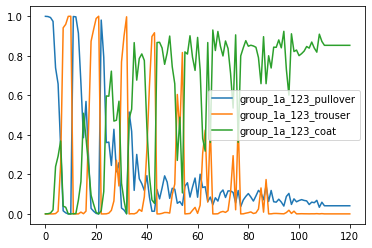

In [53]:
list_group_1a_123_pullover = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1a_123\g1a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1a_123_pullover.append(predictions[0][2])
        
list_group_1a_123_trouser = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1a_123\g1a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1a_123_trouser.append(predictions[0][1])
        
list_group_1a_123_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1a_123\g1a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1a_123_coat.append(predictions[0][4])

plt.plot(list_group_1a_123_pullover, label = "group_1a_123_pullover")
plt.plot(list_group_1a_123_trouser, label = "group_1a_123_trouser")
plt.plot(list_group_1a_123_coat, label = "group_1a_123_coat")
plt.legend()
plt.show()

### Plot Group 1b

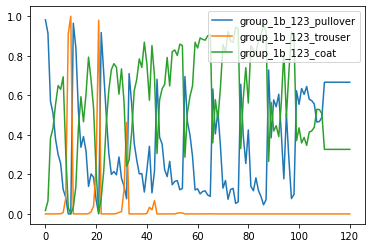

In [54]:
list_group_1b_123_pullover = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1b_123\g1b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1b_123_pullover.append(predictions[0][2])
        
list_group_1b_123_trouser = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1b_123\g1b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1b_123_trouser.append(predictions[0][1])
        
list_group_1b_123_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_1b_123\g1b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_1b_123_coat.append(predictions[0][4])

plt.plot(list_group_1b_123_pullover, label = "group_1b_123_pullover")
plt.plot(list_group_1b_123_trouser, label = "group_1b_123_trouser")
plt.plot(list_group_1b_123_coat, label = "group_1b_123_coat")
plt.legend()
plt.show()

### Plot Group 2a

C:\Users\LIN SHI\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


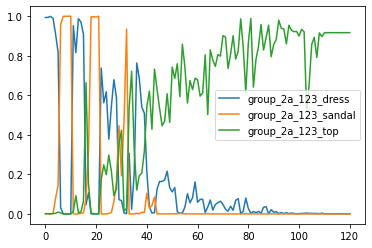

In [50]:
list_group_2a_123_dress = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2a_123\g2a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_2a_123_dress.append(predictions[0][3])
        
list_group_2a_123_sandal = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2a_123\g2a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_2a_123_sandal.append(predictions[0][5])
        
list_group_2a_123_top = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2a_123\g2a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_2a_123_top.append(predictions[0][0])

plt.plot(list_group_2a_123_dress, label = "group_2a_123_dress")
plt.plot(list_group_2a_123_sandal, label = "group_2a_123_sandal")
plt.plot(list_group_2a_123_top, label = "group_2a_123_top")
plt.legend()
plt.show()

### Plot Group 2b confirm

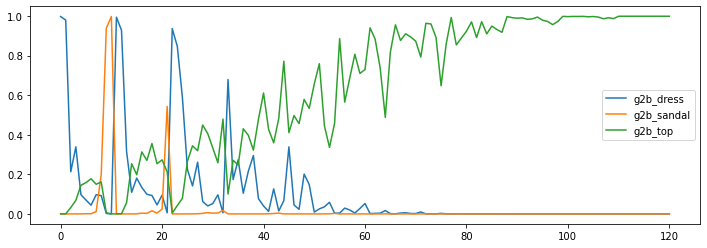

In [121]:
list_g2b_dress = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2b\g2b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g2b_dress.append(predictions[0][3])
        
list_g2b_sandal = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2b\g2b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g2b_sandal.append(predictions[0][5])
        
list_g2b_top = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_2b\g2b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g2b_top.append(predictions[0][0])
        
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.plot(list_g2b_dress, label = "g2b_dress")
plt.plot(list_g2b_sandal, label = "g2b_sandal")
plt.plot(list_g2b_top, label = "g2b_top")
plt.legend()
plt.show()

### Plot Group 3a

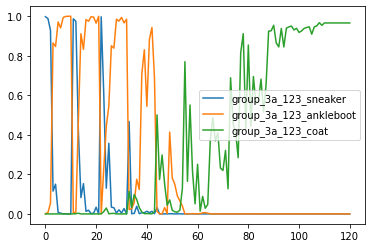

In [56]:
list_group_3a_123_sneaker = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3a_123\g3a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_3a_123_sneaker.append(predictions[0][7])
        
list_group_3a_123_ankleboot = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3a_123\g3a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_3a_123_ankleboot.append(predictions[0][9])
        
list_group_3a_123_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3a_123\g3a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_group_3a_123_coat.append(predictions[0][4])

plt.plot(list_group_3a_123_sneaker, label = "group_3a_123_sneaker")
plt.plot(list_group_3a_123_ankleboot, label = "group_3a_123_ankleboot")
plt.plot(list_group_3a_123_coat, label = "group_3a_123_coat")
plt.legend()
plt.show()

### Plot Group 3b confirm

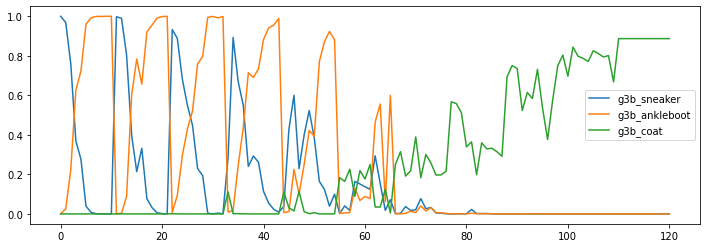

In [122]:
list_g3b_sneaker = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3b\g3b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g3b_sneaker.append(predictions[0][7])
        
list_g3b_ankleboot = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3b\g3b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g3b_ankleboot.append(predictions[0][9])
        
list_g3b_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_3b\g3b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g3b_coat.append(predictions[0][4])

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.plot(list_g3b_sneaker, label = "g3b_sneaker")
plt.plot(list_g3b_ankleboot, label = "g3b_ankleboot")
plt.plot(list_g3b_coat, label = "g3b_coat")
plt.legend()
plt.show()

### Plot Group 4a

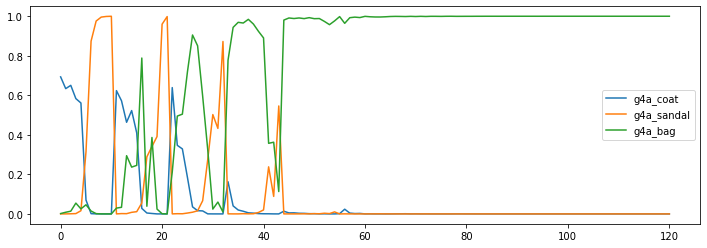

In [139]:
list_g4a_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4a\g4a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4a_coat.append(predictions[0][4])
        
list_g4a_sandal = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4a\g4a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4a_sandal.append(predictions[0][5])
        
list_g4a_bag = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4a\g4a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4a_bag.append(predictions[0][8])

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.plot(list_g4a_coat, label = "g4a_coat")
plt.plot(list_g4a_sandal, label = "g4a_sandal")
plt.plot(list_g4a_bag, label = "g4a_bag")
plt.legend()
plt.show()

### Plot Group 4b

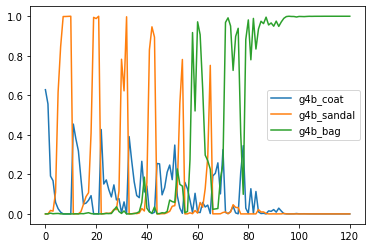

In [140]:
list_g4b_coat = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4b\g4b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4b_coat.append(predictions[0][4])
        
list_g4b_sandal = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4b\g4b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4b_sandal.append(predictions[0][5])
        
list_g4b_bag = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_4b\g4b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g4b_bag.append(predictions[0][8])

plt.plot(list_g4b_coat, label = "g4b_coat")
plt.plot(list_g4b_sandal, label = "g4b_sandal")
plt.plot(list_g4b_bag, label = "g4b_bag")
plt.legend()
plt.show()

### Plot Group 5a

In [147]:
list_g5a_top = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5a\g5a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5a_top.append(predictions[0][0])
        
list_g5a_shirt = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5a\g5a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5a_shirt.append(predictions[0][6])
        
list_g5a_dress = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5a\g5a_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5a_dress.append(predictions[0][3])

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.plot(list_g5a_123_top, label = "g5a_top")
plt.plot(list_g5a_123_shirt, label = "g5a_shirt")
plt.plot(list_g5a_123_dress, label = "g5a_dress")
plt.legend()
plt.show()

NameError: name 'list_g5a_123_top' is not defined

<Figure size 864x288 with 0 Axes>

### Plot Group 5b confirm

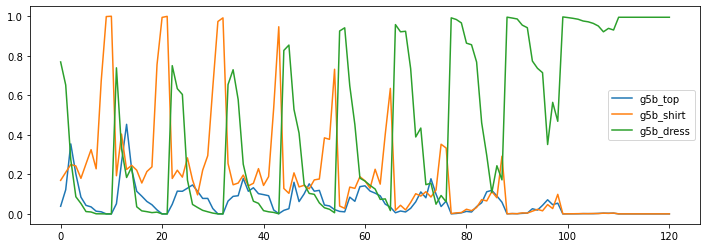

In [123]:
list_g5b_top = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5b\g5b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5b_top.append(predictions[0][0])
        
list_g5b_shirt = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5b\g5b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5b_shirt.append(predictions[0][6])
        
list_g5b_dress = []
for i in range(11):
    for j in range(11):
        test_images = load_image(r'Group_5b\g5b_'+str(i)+'_'+str(j)+'.png')
        predictions = probability_model.predict(test_images)
        list_g5b_dress.append(predictions[0][3])

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(4)

plt.plot(list_g5b_top, label = "g5b_top")
plt.plot(list_g5b_shirt, label = "g5b_shirt")
plt.plot(list_g5b_dress, label = "g5b_dress")
plt.legend()
plt.show()

### Plot 3D Landscape

In [127]:
# Using https://plotly.com/python/3d-surface-plots/
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Group 1a

In [74]:
rows = 11
cols = 11

arr_group_1a = np.array(list_group_1a_123_pullover).reshape(11,11)
sh_0, sh_1 = arr_group_1a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1a_Pullover', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [75]:
rows = 11
cols = 11

arr_group_1a = np.array(list_group_1a_123_trouser).reshape(11,11)
sh_0, sh_1 = arr_group_1a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1a_Trouser', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [76]:
rows = 11
cols = 11

arr_group_1a = np.array(list_group_1a_123_coat).reshape(11,11)
sh_0, sh_1 = arr_group_1a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1a_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 1b

In [77]:
rows = 11
cols = 11

arr_group_1b = np.array(list_group_1b_123_pullover).reshape(11,11)
sh_0, sh_1 = arr_group_1a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1b_Pullover', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [78]:
rows = 11
cols = 11

arr_group_1b = np.array(list_group_1b_123_trouser).reshape(11,11)
sh_0, sh_1 = arr_group_1b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1b_Trouser', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [79]:
rows = 11
cols = 11

arr_group_1b = np.array(list_group_1b_123_coat).reshape(11,11)
sh_0, sh_1 = arr_group_1b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_1b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_1b_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 2a

In [62]:
rows = 11
cols = 11

arr_group_2a = np.array(list_group_2a_123_dress).reshape(11,11)
sh_0, sh_1 = arr_group_2a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_2a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2a_Dress', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [63]:
rows = 11
cols = 11

arr_group_2a = np.array(list_group_2a_123_sandal).reshape(11,11)
sh_0, sh_1 = arr_group_2a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_2a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2a_Sandal', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [64]:
rows = 11
cols = 11

arr_group_2a = np.array(list_group_2a_123_top).reshape(11,11)
sh_0, sh_1 = arr_group_2a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_2a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2a_Top', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 2b confirm

In [129]:
rows = 11
cols = 11

arr_g2b = np.array(list_g2b_dress).reshape(11,11)
sh_0, sh_1 = arr_g2b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g2b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2b_Dress', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [130]:
rows = 11
cols = 11

arr_g2b = np.array(list_g2b_sandal).reshape(11,11)
sh_0, sh_1 = arr_g2b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g2b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2b_Sandal', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [131]:
rows = 11
cols = 11

arr_g2b = np.array(list_g2b_top).reshape(11,11)
sh_0, sh_1 = arr_g2b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g2b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_2b_Top', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 3a

In [68]:
rows = 11
cols = 11

arr_group_3a = np.array(list_group_3a_123_sneaker).reshape(11,11)
sh_0, sh_1 = arr_group_3a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_3a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3a_Sneaker', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [69]:
rows = 11
cols = 11

arr_group_3a = np.array(list_group_3a_123_ankleboot).reshape(11,11)
sh_0, sh_1 = arr_group_3a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_3a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3a_Ankleboot', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [80]:
rows = 11
cols = 11

arr_group_3a = np.array(list_group_3a_123_coat).reshape(11,11)
sh_0, sh_1 = arr_group_3a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_group_3a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3a_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 3b confirm

In [134]:
rows = 11
cols = 11

arr_g3b = np.array(list_g3b_sneaker).reshape(11,11)
sh_0, sh_1 = arr_g3b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g3b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3b_Sneaker', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [135]:
rows = 11
cols = 11

arr_g3b = np.array(list_g3b_ankleboot).reshape(11,11)
sh_0, sh_1 = arr_g3b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g3b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3b_AnkleBoot', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [136]:
rows = 11
cols = 11

arr_g3b = np.array(list_g3b_coat).reshape(11,11)
sh_0, sh_1 = arr_g3b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g3b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_3b_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 4a

In [141]:
rows = 11
cols = 11

arr_g4a = np.array(list_g4a_coat).reshape(11,11)
sh_0, sh_1 = arr_g4a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4a_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [142]:
rows = 11
cols = 11

arr_g4a = np.array(list_g4a_sandal).reshape(11,11)
sh_0, sh_1 = arr_g4a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4a_Sandal', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [143]:
rows = 11
cols = 11

arr_g4a = np.array(list_g4a_bag).reshape(11,11)
sh_0, sh_1 = arr_g4a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4a_Bag', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 4b

In [144]:
rows = 11
cols = 11

arr_g4b = np.array(list_g4b_coat).reshape(11,11)
sh_0, sh_1 = arr_g4b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4b_Coat', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [145]:
rows = 11
cols = 11

arr_g4b = np.array(list_g4b_sandal).reshape(11,11)
sh_0, sh_1 = arr_g4b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4b_Sandal', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [146]:
rows = 11
cols = 11

arr_g4b = np.array(list_g4b_bag).reshape(11,11)
sh_0, sh_1 = arr_g4b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g4b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_4b_Bag', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 5a

In [148]:
rows = 11
cols = 11

arr_g5a = np.array(list_g5a_top).reshape(11,11)
sh_0, sh_1 = arr_g5a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5a_Top', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [149]:
rows = 11
cols = 11

arr_g5a = np.array(list_g5a_shirt).reshape(11,11)
sh_0, sh_1 = arr_g5a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5a_Shirt', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [150]:
rows = 11
cols = 11

arr_g5a = np.array(list_g5a_dress).reshape(11,11)
sh_0, sh_1 = arr_g5a.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5a

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5a_Dress', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### Group 5b confirm

In [151]:
rows = 11
cols = 11

arr_g5b = np.array(list_g5b_top).reshape(11,11)
sh_0, sh_1 = arr_g5b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5b_Top', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [152]:
rows = 11
cols = 11

arr_g5b = np.array(list_g5b_shirt).reshape(11,11)
sh_0, sh_1 = arr_g5b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5b_Shirt', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [153]:
rows = 11
cols = 11

arr_g5b = np.array(list_g5b_dress).reshape(11,11)
sh_0, sh_1 = arr_g5b.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
z = arr_g5b

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Group_5b_Dress', autosize=False,
                  width=500, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(coloraxis_showscale=False)
fig.show()

### End

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [ ]:
img = load_img('Group_1_123\g1_0_0.png')

In [ ]:
def run_example():
    # load the image
    img = load_image(r'train\train_5_Pullover.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result)

run_example()

In [ ]:
def run_example():
    # load the image
    img = load_image('Group_1\g1_100.png')
    # load model
    model = load_model('final_model.h5')
    # predict the class
    result = np.argmax(model.predict(img), axis=1)
    print(result[0])

### 100G1G2_To_100G2G3

In [ ]:
x = 100
y = 100
new_folder = G1G2_To_G2G3(x, y)
%run autoimagemorph.py -inframes "['{new_folder}\g0.png', '{new_folder}\g10.png']" -outprefix {new_folder}\g -framerate 10